# Susceptibility to substitution

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
BIN_COUNT = 4

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from progressbar import ProgressBar
from statsmodels.stats.proportion import multinomial_proportions_confint

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope, stopwords
engine = init_db()

## 2 Susceptibility in absolute and sentence-relative values

Build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.all, max_distance=1)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        # Prepare these arrays for stopword-checking.
        dslice = slice(substitution.start,
                       substitution.start + len(substitution.destination.tokens))
        lemmas = substitution.source.lemmas[dslice]
        tokens = substitution.source.tokens[dslice]
        tags = substitution.source.tags[dslice]
        
        for feature in Substitution.__features__:
            sentence_values, _ = substitution.source_destination_features(feature)
            sentence_values_rel, _ = substitution.source_destination_features(
                feature, sentence_relative='median')
            source_type, _ = Substitution.__features__[feature]
            # Stopword-check the arrays.
            words = getattr(substitution.source, source_type)[dslice]
            for i, (word, lemma, token, tag) in enumerate(zip(words, lemmas, tokens, tags)):
                if (token in stopwords) or (lemma in stopwords):
                    # Drop stopwords from this analysis since we exclude stopword-substitutions.
                    continue
                data.append({'cluster_id': substitution.source.cluster.sid,
                             'destination_id': substitution.destination.sid,
                             'occurrence': substitution.occurrence,
                             'source_id': substitution.source.sid,
                             'feature': feature,
                             'word': word,
                             'POS': tag,
                             'target': i == substitution.position,
                             'value': sentence_values[i],
                             'value_rel': sentence_values_rel[i]})

original_susties = pd.DataFrame(data)
del data

Got 53419 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.all, max_distance=1)


  0% (    1 of 53419) |            | Elapsed Time: 0:00:04 ETA:  3 days, 0:08:09

  0% (   79 of 53419) |                    | Elapsed Time: 0:00:05 ETA:  0:11:25

  0% (  175 of 53419) |                    | Elapsed Time: 0:00:06 ETA:  0:10:13

  0% (  260 of 53419) |                    | Elapsed Time: 0:00:07 ETA:  0:10:16

  0% (  355 of 53419) |                    | Elapsed Time: 0:00:08 ETA:  0:10:00

  0% (  443 of 53419) |                    | Elapsed Time: 0:00:09 ETA:  0:09:59

  0% (  508 of 53419) |                    | Elapsed Time: 0:00:10 ETA:  0:10:27

  1% (  603 of 53419) |                    | Elapsed Time: 0:00:11 ETA:  0:10:14

  1% (  668 of 53419) |                    | Elapsed Time: 0:00:12 ETA:  0:10:06

  1% (  768 of 53419) |                    | Elapsed Time: 0:00:13 ETA:  0:09:55

  1% (  867 of 53419) |                    | Elapsed Time: 0:00:14 ETA:  0:09:37

  1% (  967 of 53419) |                    | Elapsed Time: 0:00:15 ETA:  0:09:33

  2% ( 1069 of 53419) |                    | Elapsed Time: 0:00:16 ETA:  0:09:19

  2% ( 1158 of 53419) |                    | Elapsed Time: 0:00:17 ETA:  0:09:23

  2% ( 1213 of 53419) |                    | Elapsed Time: 0:00:18 ETA:  0:09:46

  2% ( 1301 of 53419) |                    | Elapsed Time: 0:00:19 ETA:  0:09:36

  2% ( 1336 of 53419) |                    | Elapsed Time: 0:00:20 ETA:  0:09:40

  2% ( 1410 of 53419) |                    | Elapsed Time: 0:00:21 ETA:  0:09:56

  2% ( 1502 of 53419) |                    | Elapsed Time: 0:00:22 ETA:  0:10:01

  2% ( 1592 of 53419) |                    | Elapsed Time: 0:00:23 ETA:  0:10:08

  3% ( 1671 of 53419) |                    | Elapsed Time: 0:00:24 ETA:  0:10:49

  3% ( 1693 of 53419) |                    | Elapsed Time: 0:00:26 ETA:  0:14:14

  3% ( 1736 of 53419) |                    | Elapsed Time: 0:00:27 ETA:  0:15:23

  3% ( 1829 of 53419) |                    | Elapsed Time: 0:00:28 ETA:  0:14:23

  3% ( 1924 of 53419) |                    | Elapsed Time: 0:00:29 ETA:  0:14:00

  3% ( 2004 of 53419) |                    | Elapsed Time: 0:00:30 ETA:  0:13:47

  3% ( 2093 of 53419) |                    | Elapsed Time: 0:00:31 ETA:  0:13:28

  4% ( 2184 of 53419) |                    | Elapsed Time: 0:00:32 ETA:  0:13:29

  4% ( 2275 of 53419) |                    | Elapsed Time: 0:00:33 ETA:  0:13:27

  4% ( 2350 of 53419) |                    | Elapsed Time: 0:00:34 ETA:  0:13:06

  4% ( 2410 of 53419) |                    | Elapsed Time: 0:00:36 ETA:  0:11:16

  4% ( 2453 of 53419) |                    | Elapsed Time: 0:00:37 ETA:  0:11:15

  4% ( 2521 of 53419) |                    | Elapsed Time: 0:00:38 ETA:  0:12:08

  4% ( 2589 of 53419) |                    | Elapsed Time: 0:00:39 ETA:  0:12:47

  5% ( 2671 of 53419) |#                   | Elapsed Time: 0:00:40 ETA:  0:12:44

  5% ( 2754 of 53419) |#                   | Elapsed Time: 0:00:41 ETA:  0:12:50

  5% ( 2840 of 53419) |#                   | Elapsed Time: 0:00:42 ETA:  0:12:54

  5% ( 2932 of 53419) |#                   | Elapsed Time: 0:00:43 ETA:  0:12:52

  5% ( 2998 of 53419) |#                   | Elapsed Time: 0:00:44 ETA:  0:13:01

  5% ( 3067 of 53419) |#                   | Elapsed Time: 0:00:46 ETA:  0:12:10

  5% ( 3153 of 53419) |#                   | Elapsed Time: 0:00:47 ETA:  0:11:22

  6% ( 3234 of 53419) |#                   | Elapsed Time: 0:00:48 ETA:  0:10:39

  6% ( 3339 of 53419) |#                   | Elapsed Time: 0:00:49 ETA:  0:10:12

  6% ( 3433 of 53419) |#                   | Elapsed Time: 0:00:50 ETA:  0:10:00

  6% ( 3529 of 53419) |#                   | Elapsed Time: 0:00:51 ETA:  0:09:50

  6% ( 3617 of 53419) |#                   | Elapsed Time: 0:00:52 ETA:  0:09:53

  6% ( 3693 of 53419) |#                   | Elapsed Time: 0:00:53 ETA:  0:09:49

  7% ( 3749 of 53419) |#                   | Elapsed Time: 0:00:54 ETA:  0:09:56

  7% ( 3778 of 53419) |#                   | Elapsed Time: 0:00:55 ETA:  0:10:55

  7% ( 3837 of 53419) |#                   | Elapsed Time: 0:00:56 ETA:  0:11:20

  7% ( 3882 of 53419) |#                   | Elapsed Time: 0:00:57 ETA:  0:12:17

  7% ( 3963 of 53419) |#                   | Elapsed Time: 0:00:58 ETA:  0:12:17

  7% ( 4007 of 53419) |#                   | Elapsed Time: 0:00:59 ETA:  0:12:52

  7% ( 4057 of 53419) |#                   | Elapsed Time: 0:01:00 ETA:  0:14:03

  7% ( 4122 of 53419) |#                   | Elapsed Time: 0:01:01 ETA:  0:14:42

  7% ( 4219 of 53419) |#                   | Elapsed Time: 0:01:02 ETA:  0:13:56

  8% ( 4308 of 53419) |#                   | Elapsed Time: 0:01:03 ETA:  0:13:01

  8% ( 4394 of 53419) |#                   | Elapsed Time: 0:01:04 ETA:  0:11:42

  8% ( 4482 of 53419) |#                   | Elapsed Time: 0:01:05 ETA:  0:11:06

  8% ( 4577 of 53419) |#                   | Elapsed Time: 0:01:06 ETA:  0:10:12

  8% ( 4675 of 53419) |#                   | Elapsed Time: 0:01:07 ETA:  0:09:48

  8% ( 4738 of 53419) |#                   | Elapsed Time: 0:01:08 ETA:  0:09:34

  9% ( 4831 of 53419) |#                   | Elapsed Time: 0:01:09 ETA:  0:09:07

  9% ( 4890 of 53419) |#                   | Elapsed Time: 0:01:10 ETA:  0:09:41

  9% ( 4978 of 53419) |#                   | Elapsed Time: 0:01:11 ETA:  0:09:41

  9% ( 5076 of 53419) |#                   | Elapsed Time: 0:01:12 ETA:  0:09:29

  9% ( 5170 of 53419) |#                   | Elapsed Time: 0:01:13 ETA:  0:09:23

  9% ( 5262 of 53419) |#                   | Elapsed Time: 0:01:14 ETA:  0:09:24

 10% ( 5342 of 53419) |##                  | Elapsed Time: 0:01:15 ETA:  0:09:22

 10% ( 5426 of 53419) |##                  | Elapsed Time: 0:01:16 ETA:  0:09:16

 10% ( 5510 of 53419) |##                  | Elapsed Time: 0:01:17 ETA:  0:08:58

 10% ( 5595 of 53419) |##                  | Elapsed Time: 0:01:18 ETA:  0:09:04

 10% ( 5685 of 53419) |##                  | Elapsed Time: 0:01:19 ETA:  0:08:39

 10% ( 5771 of 53419) |##                  | Elapsed Time: 0:01:20 ETA:  0:08:40

 10% ( 5857 of 53419) |##                  | Elapsed Time: 0:01:21 ETA:  0:08:48

 11% ( 5949 of 53419) |##                  | Elapsed Time: 0:01:22 ETA:  0:08:48

 11% ( 6010 of 53419) |##                  | Elapsed Time: 0:01:22 ETA:  0:08:49

 11% ( 6099 of 53419) |##                  | Elapsed Time: 0:01:23 ETA:  0:08:51

 11% ( 6187 of 53419) |##                  | Elapsed Time: 0:01:24 ETA:  0:08:46

 11% ( 6277 of 53419) |##                  | Elapsed Time: 0:01:25 ETA:  0:08:41

 11% ( 6359 of 53419) |##                  | Elapsed Time: 0:01:26 ETA:  0:08:42

 12% ( 6440 of 53419) |##                  | Elapsed Time: 0:01:27 ETA:  0:08:48

 12% ( 6527 of 53419) |##                  | Elapsed Time: 0:01:29 ETA:  0:08:46

 12% ( 6619 of 53419) |##                  | Elapsed Time: 0:01:30 ETA:  0:08:40

 12% ( 6678 of 53419) |##                  | Elapsed Time: 0:01:30 ETA:  0:08:37

 12% ( 6769 of 53419) |##                  | Elapsed Time: 0:01:31 ETA:  0:08:35

 12% ( 6868 of 53419) |##                  | Elapsed Time: 0:01:32 ETA:  0:08:26

 13% ( 6960 of 53419) |##                  | Elapsed Time: 0:01:33 ETA:  0:08:22

 13% ( 7051 of 53419) |##                  | Elapsed Time: 0:01:34 ETA:  0:08:20

 13% ( 7142 of 53419) |##                  | Elapsed Time: 0:01:35 ETA:  0:08:13

 13% ( 7231 of 53419) |##                  | Elapsed Time: 0:01:36 ETA:  0:08:06

 13% ( 7323 of 53419) |##                  | Elapsed Time: 0:01:37 ETA:  0:08:01

 13% ( 7346 of 53419) |##                  | Elapsed Time: 0:01:37 ETA:  0:08:04

 13% ( 7423 of 53419) |##                  | Elapsed Time: 0:01:38 ETA:  0:08:18

 14% ( 7521 of 53419) |##                  | Elapsed Time: 0:01:39 ETA:  0:08:12

 14% ( 7617 of 53419) |##                  | Elapsed Time: 0:01:40 ETA:  0:08:13

 14% ( 7714 of 53419) |##                  | Elapsed Time: 0:01:41 ETA:  0:08:08

 14% ( 7805 of 53419) |##                  | Elapsed Time: 0:01:42 ETA:  0:08:07

 14% ( 7888 of 53419) |##                  | Elapsed Time: 0:01:43 ETA:  0:08:12

 14% ( 7966 of 53419) |##                  | Elapsed Time: 0:01:44 ETA:  0:08:21

 15% ( 8013 of 53419) |###                 | Elapsed Time: 0:01:45 ETA:  0:08:26

 15% ( 8091 of 53419) |###                 | Elapsed Time: 0:01:46 ETA:  0:08:31

 15% ( 8136 of 53419) |###                 | Elapsed Time: 0:01:47 ETA:  0:09:14

 15% ( 8211 of 53419) |###                 | Elapsed Time: 0:01:48 ETA:  0:09:36

 15% ( 8287 of 53419) |###                 | Elapsed Time: 0:01:49 ETA:  0:09:55

 15% ( 8360 of 53419) |###                 | Elapsed Time: 0:01:50 ETA:  0:10:21

 15% ( 8430 of 53419) |###                 | Elapsed Time: 0:01:51 ETA:  0:10:44

 15% ( 8509 of 53419) |###                 | Elapsed Time: 0:01:52 ETA:  0:10:47

 16% ( 8583 of 53419) |###                 | Elapsed Time: 0:01:53 ETA:  0:10:54

 16% ( 8660 of 53419) |###                 | Elapsed Time: 0:01:54 ETA:  0:10:53

 16% ( 8681 of 53419) |###                 | Elapsed Time: 0:01:55 ETA:  0:10:55

 16% ( 8764 of 53419) |###                 | Elapsed Time: 0:01:56 ETA:  0:09:48

 16% ( 8849 of 53419) |###                 | Elapsed Time: 0:01:57 ETA:  0:09:36

 16% ( 8932 of 53419) |###                 | Elapsed Time: 0:01:58 ETA:  0:09:28

 16% ( 9016 of 53419) |###                 | Elapsed Time: 0:01:59 ETA:  0:09:15

 17% ( 9112 of 53419) |###                 | Elapsed Time: 0:02:00 ETA:  0:08:49

 17% ( 9196 of 53419) |###                 | Elapsed Time: 0:02:01 ETA:  0:08:44

 17% ( 9286 of 53419) |###                 | Elapsed Time: 0:02:02 ETA:  0:08:26

 17% ( 9349 of 53419) |###                 | Elapsed Time: 0:02:02 ETA:  0:08:17

 17% ( 9431 of 53419) |###                 | Elapsed Time: 0:02:03 ETA:  0:08:22

 17% ( 9518 of 53419) |###                 | Elapsed Time: 0:02:04 ETA:  0:08:17

 17% ( 9600 of 53419) |###                 | Elapsed Time: 0:02:05 ETA:  0:08:19

 18% ( 9674 of 53419) |###                 | Elapsed Time: 0:02:06 ETA:  0:08:25

 18% ( 9765 of 53419) |###                 | Elapsed Time: 0:02:07 ETA:  0:08:18

 18% ( 9854 of 53419) |###                 | Elapsed Time: 0:02:08 ETA:  0:08:23

 18% ( 9940 of 53419) |###                 | Elapsed Time: 0:02:09 ETA:  0:08:20

 18% (10017 of 53419) |###                 | Elapsed Time: 0:02:10 ETA:  0:08:18

 18% (10109 of 53419) |###                 | Elapsed Time: 0:02:11 ETA:  0:08:12

 19% (10202 of 53419) |###                 | Elapsed Time: 0:02:12 ETA:  0:08:02

 19% (10304 of 53419) |###                 | Elapsed Time: 0:02:13 ETA:  0:07:49

 19% (10399 of 53419) |###                 | Elapsed Time: 0:02:14 ETA:  0:07:38

 19% (10491 of 53419) |###                 | Elapsed Time: 0:02:15 ETA:  0:07:24

 19% (10592 of 53419) |###                 | Elapsed Time: 0:02:16 ETA:  0:07:17

 20% (10684 of 53419) |####                | Elapsed Time: 0:02:17 ETA:  0:07:12

 20% (10781 of 53419) |####                | Elapsed Time: 0:02:18 ETA:  0:07:07

 20% (10870 of 53419) |####                | Elapsed Time: 0:02:19 ETA:  0:07:09

 20% (10965 of 53419) |####                | Elapsed Time: 0:02:20 ETA:  0:07:06

 20% (11061 of 53419) |####                | Elapsed Time: 0:02:21 ETA:  0:07:09

 20% (11159 of 53419) |####                | Elapsed Time: 0:02:22 ETA:  0:07:06

 21% (11261 of 53419) |####                | Elapsed Time: 0:02:23 ETA:  0:06:58

 21% (11352 of 53419) |####                | Elapsed Time: 0:02:24 ETA:  0:06:57

 21% (11454 of 53419) |####                | Elapsed Time: 0:02:25 ETA:  0:06:44

 21% (11548 of 53419) |####                | Elapsed Time: 0:02:26 ETA:  0:06:46

 21% (11642 of 53419) |####                | Elapsed Time: 0:02:27 ETA:  0:06:47

 21% (11742 of 53419) |####                | Elapsed Time: 0:02:28 ETA:  0:06:39

 22% (11837 of 53419) |####                | Elapsed Time: 0:02:29 ETA:  0:06:38

 22% (11934 of 53419) |####                | Elapsed Time: 0:02:30 ETA:  0:06:36

 22% (12012 of 53419) |####                | Elapsed Time: 0:02:31 ETA:  0:06:48

 22% (12020 of 53419) |####                | Elapsed Time: 0:02:32 ETA:  0:07:05

 22% (12079 of 53419) |####                | Elapsed Time: 0:02:33 ETA:  0:07:38

 22% (12122 of 53419) |####                | Elapsed Time: 0:02:34 ETA:  0:08:50

 22% (12187 of 53419) |####                | Elapsed Time: 0:02:35 ETA:  0:09:20

 22% (12255 of 53419) |####                | Elapsed Time: 0:02:36 ETA:  0:09:48

 23% (12329 of 53419) |####                | Elapsed Time: 0:02:37 ETA:  0:10:21

 23% (12401 of 53419) |####                | Elapsed Time: 0:02:38 ETA:  0:10:51

 23% (12464 of 53419) |####                | Elapsed Time: 0:02:39 ETA:  0:11:42

 23% (12537 of 53419) |####                | Elapsed Time: 0:02:40 ETA:  0:11:50

 23% (12605 of 53419) |####                | Elapsed Time: 0:02:41 ETA:  0:11:28

 23% (12688 of 53419) |####                | Elapsed Time: 0:02:42 ETA:  0:10:15

 23% (12760 of 53419) |####                | Elapsed Time: 0:02:43 ETA:  0:10:04

 24% (12828 of 53419) |####                | Elapsed Time: 0:02:44 ETA:  0:10:03

 24% (12925 of 53419) |####                | Elapsed Time: 0:02:45 ETA:  0:09:33

 24% (13021 of 53419) |####                | Elapsed Time: 0:02:46 ETA:  0:09:03

 24% (13110 of 53419) |####                | Elapsed Time: 0:02:47 ETA:  0:08:34

 24% (13199 of 53419) |####                | Elapsed Time: 0:02:48 ETA:  0:08:16

 24% (13287 of 53419) |####                | Elapsed Time: 0:02:49 ETA:  0:07:55

 25% (13355 of 53419) |#####               | Elapsed Time: 0:02:50 ETA:  0:07:32

 25% (13450 of 53419) |#####               | Elapsed Time: 0:02:51 ETA:  0:07:22

 25% (13540 of 53419) |#####               | Elapsed Time: 0:02:52 ETA:  0:07:07

 25% (13631 of 53419) |#####               | Elapsed Time: 0:02:53 ETA:  0:06:49

 25% (13721 of 53419) |#####               | Elapsed Time: 0:02:54 ETA:  0:06:53

 25% (13787 of 53419) |#####               | Elapsed Time: 0:02:55 ETA:  0:07:19

 25% (13862 of 53419) |#####               | Elapsed Time: 0:02:56 ETA:  0:07:29

 26% (13949 of 53419) |#####               | Elapsed Time: 0:02:57 ETA:  0:07:30

 26% (14023 of 53419) |#####               | Elapsed Time: 0:02:58 ETA:  0:07:59

 26% (14130 of 53419) |#####               | Elapsed Time: 0:02:59 ETA:  0:07:47

 26% (14212 of 53419) |#####               | Elapsed Time: 0:03:00 ETA:  0:07:55

 26% (14279 of 53419) |#####               | Elapsed Time: 0:03:01 ETA:  0:08:18

 26% (14363 of 53419) |#####               | Elapsed Time: 0:03:02 ETA:  0:08:24

 27% (14462 of 53419) |#####               | Elapsed Time: 0:03:03 ETA:  0:07:45

 27% (14565 of 53419) |#####               | Elapsed Time: 0:03:04 ETA:  0:07:19

 27% (14649 of 53419) |#####               | Elapsed Time: 0:03:05 ETA:  0:07:20

 27% (14691 of 53419) |#####               | Elapsed Time: 0:03:06 ETA:  0:06:57

 27% (14754 of 53419) |#####               | Elapsed Time: 0:03:07 ETA:  0:07:18

 27% (14829 of 53419) |#####               | Elapsed Time: 0:03:08 ETA:  0:07:46

 27% (14903 of 53419) |#####               | Elapsed Time: 0:03:09 ETA:  0:07:51

 28% (14984 of 53419) |#####               | Elapsed Time: 0:03:10 ETA:  0:07:37

 28% (15089 of 53419) |#####               | Elapsed Time: 0:03:11 ETA:  0:07:17

 28% (15192 of 53419) |#####               | Elapsed Time: 0:03:12 ETA:  0:07:13

 28% (15287 of 53419) |#####               | Elapsed Time: 0:03:13 ETA:  0:07:19

 28% (15358 of 53419) |#####               | Elapsed Time: 0:03:14 ETA:  0:07:37

 28% (15444 of 53419) |#####               | Elapsed Time: 0:03:15 ETA:  0:07:15

 29% (15555 of 53419) |#####               | Elapsed Time: 0:03:16 ETA:  0:06:42

 29% (15634 of 53419) |#####               | Elapsed Time: 0:03:17 ETA:  0:06:37

 29% (15695 of 53419) |#####               | Elapsed Time: 0:03:18 ETA:  0:06:54

 29% (15776 of 53419) |#####               | Elapsed Time: 0:03:19 ETA:  0:07:14

 29% (15854 of 53419) |#####               | Elapsed Time: 0:03:20 ETA:  0:07:37

 29% (15937 of 53419) |#####               | Elapsed Time: 0:03:21 ETA:  0:07:48

 30% (16026 of 53419) |######              | Elapsed Time: 0:03:22 ETA:  0:07:24

 30% (16128 of 53419) |######              | Elapsed Time: 0:03:23 ETA:  0:07:07

 30% (16232 of 53419) |######              | Elapsed Time: 0:03:24 ETA:  0:07:13

 30% (16335 of 53419) |######              | Elapsed Time: 0:03:25 ETA:  0:06:54

 30% (16419 of 53419) |######              | Elapsed Time: 0:03:26 ETA:  0:06:33

 30% (16498 of 53419) |######              | Elapsed Time: 0:03:27 ETA:  0:06:33

 30% (16519 of 53419) |######              | Elapsed Time: 0:03:28 ETA:  0:07:24

 31% (16607 of 53419) |######              | Elapsed Time: 0:03:29 ETA:  0:07:17

 31% (16694 of 53419) |######              | Elapsed Time: 0:03:30 ETA:  0:07:20

 31% (16777 of 53419) |######              | Elapsed Time: 0:03:31 ETA:  0:07:38

 31% (16873 of 53419) |######              | Elapsed Time: 0:03:32 ETA:  0:07:46

 31% (16954 of 53419) |######              | Elapsed Time: 0:03:33 ETA:  0:08:05

 31% (17019 of 53419) |######              | Elapsed Time: 0:03:34 ETA:  0:08:26

 31% (17089 of 53419) |######              | Elapsed Time: 0:03:35 ETA:  0:08:36

 32% (17170 of 53419) |######              | Elapsed Time: 0:03:36 ETA:  0:07:28

 32% (17241 of 53419) |######              | Elapsed Time: 0:03:37 ETA:  0:07:44

 32% (17317 of 53419) |######              | Elapsed Time: 0:03:38 ETA:  0:07:48

 32% (17362 of 53419) |######              | Elapsed Time: 0:03:39 ETA:  0:07:47

 32% (17462 of 53419) |######              | Elapsed Time: 0:03:40 ETA:  0:07:29

 32% (17507 of 53419) |######              | Elapsed Time: 0:03:41 ETA:  0:08:23

 32% (17579 of 53419) |######              | Elapsed Time: 0:03:42 ETA:  0:08:32

 33% (17654 of 53419) |######              | Elapsed Time: 0:03:43 ETA:  0:08:20

 33% (17744 of 53419) |######              | Elapsed Time: 0:03:44 ETA:  0:08:02

 33% (17828 of 53419) |######              | Elapsed Time: 0:03:45 ETA:  0:07:57

 33% (17914 of 53419) |######              | Elapsed Time: 0:03:46 ETA:  0:07:41

 33% (17997 of 53419) |######              | Elapsed Time: 0:03:47 ETA:  0:07:33

 33% (18029 of 53419) |######              | Elapsed Time: 0:03:47 ETA:  0:07:41

 33% (18105 of 53419) |######              | Elapsed Time: 0:03:48 ETA:  0:08:05

 34% (18200 of 53419) |######              | Elapsed Time: 0:03:49 ETA:  0:07:11

 34% (18286 of 53419) |######              | Elapsed Time: 0:03:50 ETA:  0:06:57

 34% (18380 of 53419) |######              | Elapsed Time: 0:03:51 ETA:  0:06:39

 34% (18480 of 53419) |######              | Elapsed Time: 0:03:52 ETA:  0:06:25

 34% (18574 of 53419) |######              | Elapsed Time: 0:03:53 ETA:  0:06:16

 34% (18658 of 53419) |######              | Elapsed Time: 0:03:54 ETA:  0:06:16

 35% (18697 of 53419) |#######             | Elapsed Time: 0:03:55 ETA:  0:06:11

 35% (18799 of 53419) |#######             | Elapsed Time: 0:03:56 ETA:  0:05:52

 35% (18897 of 53419) |#######             | Elapsed Time: 0:03:57 ETA:  0:05:34

 35% (18977 of 53419) |#######             | Elapsed Time: 0:03:58 ETA:  0:05:45

 35% (19045 of 53419) |#######             | Elapsed Time: 0:03:59 ETA:  0:05:58

 35% (19114 of 53419) |#######             | Elapsed Time: 0:04:00 ETA:  0:06:18

 35% (19193 of 53419) |#######             | Elapsed Time: 0:04:01 ETA:  0:06:35

 36% (19258 of 53419) |#######             | Elapsed Time: 0:04:02 ETA:  0:07:01

 36% (19325 of 53419) |#######             | Elapsed Time: 0:04:03 ETA:  0:07:18

 36% (19365 of 53419) |#######             | Elapsed Time: 0:04:03 ETA:  0:07:26

 36% (19445 of 53419) |#######             | Elapsed Time: 0:04:04 ETA:  0:07:48

 36% (19526 of 53419) |#######             | Elapsed Time: 0:04:05 ETA:  0:08:10

 36% (19589 of 53419) |#######             | Elapsed Time: 0:04:06 ETA:  0:08:29

 36% (19662 of 53419) |#######             | Elapsed Time: 0:04:07 ETA:  0:08:22

 36% (19741 of 53419) |#######             | Elapsed Time: 0:04:08 ETA:  0:08:09

 37% (19802 of 53419) |#######             | Elapsed Time: 0:04:09 ETA:  0:08:29

 37% (19873 of 53419) |#######             | Elapsed Time: 0:04:10 ETA:  0:08:20

 37% (19973 of 53419) |#######             | Elapsed Time: 0:04:11 ETA:  0:07:40

 37% (20033 of 53419) |#######             | Elapsed Time: 0:04:12 ETA:  0:07:32

 37% (20110 of 53419) |#######             | Elapsed Time: 0:04:13 ETA:  0:07:35

 37% (20189 of 53419) |#######             | Elapsed Time: 0:04:14 ETA:  0:07:33

 37% (20286 of 53419) |#######             | Elapsed Time: 0:04:15 ETA:  0:06:57

 38% (20374 of 53419) |#######             | Elapsed Time: 0:04:16 ETA:  0:06:42

 38% (20446 of 53419) |#######             | Elapsed Time: 0:04:17 ETA:  0:06:48

 38% (20508 of 53419) |#######             | Elapsed Time: 0:04:18 ETA:  0:06:46

 38% (20574 of 53419) |#######             | Elapsed Time: 0:04:19 ETA:  0:06:50

 38% (20660 of 53419) |#######             | Elapsed Time: 0:04:20 ETA:  0:07:02

 38% (20700 of 53419) |#######             | Elapsed Time: 0:04:21 ETA:  0:06:53

 38% (20788 of 53419) |#######             | Elapsed Time: 0:04:22 ETA:  0:06:43

 39% (20879 of 53419) |#######             | Elapsed Time: 0:04:23 ETA:  0:06:30

 39% (20977 of 53419) |#######             | Elapsed Time: 0:04:24 ETA:  0:06:28

 39% (21059 of 53419) |#######             | Elapsed Time: 0:04:25 ETA:  0:06:33

 39% (21155 of 53419) |#######             | Elapsed Time: 0:04:26 ETA:  0:06:09

 39% (21243 of 53419) |#######             | Elapsed Time: 0:04:27 ETA:  0:05:46

 39% (21331 of 53419) |#######             | Elapsed Time: 0:04:28 ETA:  0:05:28

 40% (21368 of 53419) |########            | Elapsed Time: 0:04:28 ETA:  0:05:29

 40% (21458 of 53419) |########            | Elapsed Time: 0:04:29 ETA:  0:05:33

 40% (21550 of 53419) |########            | Elapsed Time: 0:04:30 ETA:  0:05:27

 40% (21631 of 53419) |########            | Elapsed Time: 0:04:31 ETA:  0:05:34

 40% (21715 of 53419) |########            | Elapsed Time: 0:04:32 ETA:  0:05:45

 40% (21766 of 53419) |########            | Elapsed Time: 0:04:34 ETA:  0:06:47

 40% (21849 of 53419) |########            | Elapsed Time: 0:04:35 ETA:  0:06:59

 41% (21932 of 53419) |########            | Elapsed Time: 0:04:36 ETA:  0:07:02

 41% (22036 of 53419) |########            | Elapsed Time: 0:04:37 ETA:  0:07:00

 41% (22123 of 53419) |########            | Elapsed Time: 0:04:38 ETA:  0:07:02

 41% (22226 of 53419) |########            | Elapsed Time: 0:04:39 ETA:  0:06:50

 41% (22321 of 53419) |########            | Elapsed Time: 0:04:40 ETA:  0:06:35

 41% (22423 of 53419) |########            | Elapsed Time: 0:04:41 ETA:  0:06:17

 42% (22525 of 53419) |########            | Elapsed Time: 0:04:42 ETA:  0:04:58

 42% (22608 of 53419) |########            | Elapsed Time: 0:04:43 ETA:  0:04:57

 42% (22683 of 53419) |########            | Elapsed Time: 0:04:44 ETA:  0:05:02

 42% (22704 of 53419) |########            | Elapsed Time: 0:04:44 ETA:  0:05:00

 42% (22786 of 53419) |########            | Elapsed Time: 0:04:45 ETA:  0:05:06

 42% (22864 of 53419) |########            | Elapsed Time: 0:04:46 ETA:  0:05:12

 42% (22967 of 53419) |########            | Elapsed Time: 0:04:47 ETA:  0:05:11

 43% (23069 of 53419) |########            | Elapsed Time: 0:04:48 ETA:  0:05:04

 43% (23175 of 53419) |########            | Elapsed Time: 0:04:49 ETA:  0:04:59

 43% (23278 of 53419) |########            | Elapsed Time: 0:04:50 ETA:  0:04:57

 43% (23371 of 53419) |########            | Elapsed Time: 0:04:51 ETA:  0:04:43

 43% (23469 of 53419) |########            | Elapsed Time: 0:04:52 ETA:  0:04:25

 44% (23561 of 53419) |########            | Elapsed Time: 0:04:53 ETA:  0:04:25

 44% (23655 of 53419) |########            | Elapsed Time: 0:04:54 ETA:  0:04:16

 44% (23748 of 53419) |########            | Elapsed Time: 0:04:55 ETA:  0:04:18

 44% (23851 of 53419) |########            | Elapsed Time: 0:04:56 ETA:  0:04:17

 44% (23945 of 53419) |########            | Elapsed Time: 0:04:57 ETA:  0:04:22

 44% (24018 of 53419) |########            | Elapsed Time: 0:04:58 ETA:  0:04:43

 45% (24039 of 53419) |#########           | Elapsed Time: 0:04:59 ETA:  0:04:57

 45% (24114 of 53419) |#########           | Elapsed Time: 0:05:00 ETA:  0:05:16

 45% (24202 of 53419) |#########           | Elapsed Time: 0:05:01 ETA:  0:05:24

 45% (24288 of 53419) |#########           | Elapsed Time: 0:05:02 ETA:  0:05:27

 45% (24371 of 53419) |#########           | Elapsed Time: 0:05:03 ETA:  0:05:36

 45% (24466 of 53419) |#########           | Elapsed Time: 0:05:04 ETA:  0:05:18

 45% (24552 of 53419) |#########           | Elapsed Time: 0:05:05 ETA:  0:05:32

 46% (24654 of 53419) |#########           | Elapsed Time: 0:05:06 ETA:  0:05:23

 46% (24707 of 53419) |#########           | Elapsed Time: 0:05:06 ETA:  0:05:14

 46% (24788 of 53419) |#########           | Elapsed Time: 0:05:07 ETA:  0:05:13

 46% (24894 of 53419) |#########           | Elapsed Time: 0:05:08 ETA:  0:04:47

 46% (24980 of 53419) |#########           | Elapsed Time: 0:05:09 ETA:  0:04:48

 46% (25061 of 53419) |#########           | Elapsed Time: 0:05:10 ETA:  0:04:51

 47% (25152 of 53419) |#########           | Elapsed Time: 0:05:11 ETA:  0:04:44

 47% (25252 of 53419) |#########           | Elapsed Time: 0:05:12 ETA:  0:04:39

 47% (25350 of 53419) |#########           | Elapsed Time: 0:05:13 ETA:  0:04:30

 47% (25375 of 53419) |#########           | Elapsed Time: 0:05:14 ETA:  0:04:35

 47% (25473 of 53419) |#########           | Elapsed Time: 0:05:15 ETA:  0:04:23

 47% (25568 of 53419) |#########           | Elapsed Time: 0:05:16 ETA:  0:04:11

 48% (25665 of 53419) |#########           | Elapsed Time: 0:05:17 ETA:  0:04:16

 48% (25727 of 53419) |#########           | Elapsed Time: 0:05:18 ETA:  0:04:34

 48% (25807 of 53419) |#########           | Elapsed Time: 0:05:19 ETA:  0:04:33

 48% (25898 of 53419) |#########           | Elapsed Time: 0:05:20 ETA:  0:04:32

 48% (26002 of 53419) |#########           | Elapsed Time: 0:05:21 ETA:  0:04:28

 48% (26042 of 53419) |#########           | Elapsed Time: 0:05:21 ETA:  0:04:34

 48% (26123 of 53419) |#########           | Elapsed Time: 0:05:22 ETA:  0:04:44

 49% (26183 of 53419) |#########           | Elapsed Time: 0:05:23 ETA:  0:05:17

 49% (26239 of 53419) |#########           | Elapsed Time: 0:05:24 ETA:  0:05:54

 49% (26312 of 53419) |#########           | Elapsed Time: 0:05:25 ETA:  0:06:18

 49% (26403 of 53419) |#########           | Elapsed Time: 0:05:26 ETA:  0:05:47

 49% (26476 of 53419) |#########           | Elapsed Time: 0:05:27 ETA:  0:05:54

 49% (26539 of 53419) |#########           | Elapsed Time: 0:05:28 ETA:  0:06:23

 49% (26620 of 53419) |#########           | Elapsed Time: 0:05:29 ETA:  0:06:48

 50% (26710 of 53419) |##########          | Elapsed Time: 0:05:30 ETA:  0:06:35

 50% (26804 of 53419) |##########          | Elapsed Time: 0:05:31 ETA:  0:06:20

 50% (26899 of 53419) |##########          | Elapsed Time: 0:05:32 ETA:  0:05:44

 50% (26991 of 53419) |##########          | Elapsed Time: 0:05:33 ETA:  0:05:10

 50% (27070 of 53419) |##########          | Elapsed Time: 0:05:34 ETA:  0:05:03

 50% (27154 of 53419) |##########          | Elapsed Time: 0:05:35 ETA:  0:05:09

 51% (27253 of 53419) |##########          | Elapsed Time: 0:05:36 ETA:  0:04:46

 51% (27378 of 53419) |##########          | Elapsed Time: 0:05:37 ETA:  0:04:00

 51% (27480 of 53419) |##########          | Elapsed Time: 0:05:38 ETA:  0:03:51

 51% (27578 of 53419) |##########          | Elapsed Time: 0:05:39 ETA:  0:03:46

 51% (27692 of 53419) |##########          | Elapsed Time: 0:05:40 ETA:  0:03:31

 52% (27805 of 53419) |##########          | Elapsed Time: 0:05:41 ETA:  0:03:16

 52% (27890 of 53419) |##########          | Elapsed Time: 0:05:42 ETA:  0:03:11

 52% (27988 of 53419) |##########          | Elapsed Time: 0:05:43 ETA:  0:03:01

 52% (28045 of 53419) |##########          | Elapsed Time: 0:05:44 ETA:  0:02:54

 52% (28143 of 53419) |##########          | Elapsed Time: 0:05:45 ETA:  0:03:01

 52% (28243 of 53419) |##########          | Elapsed Time: 0:05:46 ETA:  0:03:01

 53% (28344 of 53419) |##########          | Elapsed Time: 0:05:47 ETA:  0:03:01

 53% (28366 of 53419) |##########          | Elapsed Time: 0:05:48 ETA:  0:04:16

 53% (28465 of 53419) |##########          | Elapsed Time: 0:05:49 ETA:  0:04:26

 53% (28569 of 53419) |##########          | Elapsed Time: 0:05:50 ETA:  0:04:32

 53% (28675 of 53419) |##########          | Elapsed Time: 0:05:51 ETA:  0:04:14

 53% (28713 of 53419) |##########          | Elapsed Time: 0:05:52 ETA:  0:04:18

 53% (28814 of 53419) |##########          | Elapsed Time: 0:05:53 ETA:  0:04:17

 54% (28917 of 53419) |##########          | Elapsed Time: 0:05:54 ETA:  0:04:12

 54% (29017 of 53419) |##########          | Elapsed Time: 0:05:55 ETA:  0:04:11

 54% (29093 of 53419) |##########          | Elapsed Time: 0:05:56 ETA:  0:04:29

 54% (29169 of 53419) |##########          | Elapsed Time: 0:05:57 ETA:  0:03:22

 54% (29256 of 53419) |##########          | Elapsed Time: 0:05:58 ETA:  0:03:29

 54% (29336 of 53419) |##########          | Elapsed Time: 0:05:59 ETA:  0:03:49

 55% (29381 of 53419) |###########         | Elapsed Time: 0:05:59 ETA:  0:03:56

 55% (29486 of 53419) |###########         | Elapsed Time: 0:06:00 ETA:  0:03:47

 55% (29593 of 53419) |###########         | Elapsed Time: 0:06:01 ETA:  0:03:41

 55% (29659 of 53419) |###########         | Elapsed Time: 0:06:02 ETA:  0:04:09

 55% (29726 of 53419) |###########         | Elapsed Time: 0:06:03 ETA:  0:04:37

 55% (29802 of 53419) |###########         | Elapsed Time: 0:06:04 ETA:  0:04:36

 55% (29895 of 53419) |###########         | Elapsed Time: 0:06:05 ETA:  0:04:21

 56% (29987 of 53419) |###########         | Elapsed Time: 0:06:06 ETA:  0:04:16

 56% (30049 of 53419) |###########         | Elapsed Time: 0:06:07 ETA:  0:03:59

 56% (30156 of 53419) |###########         | Elapsed Time: 0:06:08 ETA:  0:03:49

 56% (30248 of 53419) |###########         | Elapsed Time: 0:06:09 ETA:  0:03:58

 56% (30336 of 53419) |###########         | Elapsed Time: 0:06:10 ETA:  0:04:13

 56% (30434 of 53419) |###########         | Elapsed Time: 0:06:11 ETA:  0:03:46

 57% (30525 of 53419) |###########         | Elapsed Time: 0:06:12 ETA:  0:03:27

 57% (30619 of 53419) |###########         | Elapsed Time: 0:06:13 ETA:  0:03:13

 57% (30716 of 53419) |###########         | Elapsed Time: 0:06:14 ETA:  0:03:18

 57% (30802 of 53419) |###########         | Elapsed Time: 0:06:15 ETA:  0:03:25

 57% (30903 of 53419) |###########         | Elapsed Time: 0:06:16 ETA:  0:03:29

 58% (30989 of 53419) |###########         | Elapsed Time: 0:06:17 ETA:  0:03:33

 58% (31087 of 53419) |###########         | Elapsed Time: 0:06:18 ETA:  0:03:24

 58% (31179 of 53419) |###########         | Elapsed Time: 0:06:19 ETA:  0:03:28

 58% (31278 of 53419) |###########         | Elapsed Time: 0:06:20 ETA:  0:03:20

 58% (31366 of 53419) |###########         | Elapsed Time: 0:06:21 ETA:  0:03:24

 58% (31384 of 53419) |###########         | Elapsed Time: 0:06:21 ETA:  0:03:20

 58% (31476 of 53419) |###########         | Elapsed Time: 0:06:22 ETA:  0:03:17

 59% (31569 of 53419) |###########         | Elapsed Time: 0:06:23 ETA:  0:03:11

 59% (31668 of 53419) |###########         | Elapsed Time: 0:06:24 ETA:  0:03:12

 59% (31770 of 53419) |###########         | Elapsed Time: 0:06:25 ETA:  0:02:59

 59% (31858 of 53419) |###########         | Elapsed Time: 0:06:26 ETA:  0:03:06

 59% (31939 of 53419) |###########         | Elapsed Time: 0:06:27 ETA:  0:03:13

 59% (32015 of 53419) |###########         | Elapsed Time: 0:06:28 ETA:  0:03:30

 60% (32052 of 53419) |############        | Elapsed Time: 0:06:29 ETA:  0:03:27

 60% (32144 of 53419) |############        | Elapsed Time: 0:06:30 ETA:  0:03:22

 60% (32227 of 53419) |############        | Elapsed Time: 0:06:31 ETA:  0:03:29

 60% (32317 of 53419) |############        | Elapsed Time: 0:06:32 ETA:  0:03:31

 60% (32424 of 53419) |############        | Elapsed Time: 0:06:33 ETA:  0:03:24

 60% (32521 of 53419) |############        | Elapsed Time: 0:06:34 ETA:  0:03:26

 61% (32625 of 53419) |############        | Elapsed Time: 0:06:35 ETA:  0:03:12

 61% (32720 of 53419) |############        | Elapsed Time: 0:06:36 ETA:  0:02:58

 61% (32817 of 53419) |############        | Elapsed Time: 0:06:37 ETA:  0:02:42

 61% (32927 of 53419) |############        | Elapsed Time: 0:06:38 ETA:  0:02:32

 61% (33040 of 53419) |############        | Elapsed Time: 0:06:39 ETA:  0:02:18

 62% (33130 of 53419) |############        | Elapsed Time: 0:06:40 ETA:  0:02:12

 62% (33207 of 53419) |############        | Elapsed Time: 0:06:41 ETA:  0:02:19

 62% (33286 of 53419) |############        | Elapsed Time: 0:06:42 ETA:  0:02:35

 62% (33387 of 53419) |############        | Elapsed Time: 0:06:43 ETA:  0:02:41

 62% (33468 of 53419) |############        | Elapsed Time: 0:06:44 ETA:  0:02:54

 62% (33570 of 53419) |############        | Elapsed Time: 0:06:45 ETA:  0:02:49

 63% (33672 of 53419) |############        | Elapsed Time: 0:06:46 ETA:  0:02:54

 63% (33764 of 53419) |############        | Elapsed Time: 0:06:47 ETA:  0:03:11

 63% (33857 of 53419) |############        | Elapsed Time: 0:06:48 ETA:  0:03:07

 63% (33943 of 53419) |############        | Elapsed Time: 0:06:49 ETA:  0:02:58

 63% (34022 of 53419) |############        | Elapsed Time: 0:06:50 ETA:  0:02:58

 63% (34055 of 53419) |############        | Elapsed Time: 0:06:50 ETA:  0:03:01

 63% (34156 of 53419) |############        | Elapsed Time: 0:06:51 ETA:  0:02:52

 64% (34252 of 53419) |############        | Elapsed Time: 0:06:52 ETA:  0:02:39

 64% (34338 of 53419) |############        | Elapsed Time: 0:06:53 ETA:  0:02:50

 64% (34423 of 53419) |############        | Elapsed Time: 0:06:54 ETA:  0:03:03

 64% (34532 of 53419) |############        | Elapsed Time: 0:06:55 ETA:  0:02:50

 64% (34626 of 53419) |############        | Elapsed Time: 0:06:56 ETA:  0:02:48

 65% (34723 of 53419) |#############       | Elapsed Time: 0:06:57 ETA:  0:02:39

 65% (34819 of 53419) |#############       | Elapsed Time: 0:06:58 ETA:  0:02:25

 65% (34900 of 53419) |#############       | Elapsed Time: 0:06:59 ETA:  0:02:33

 65% (34993 of 53419) |#############       | Elapsed Time: 0:07:00 ETA:  0:02:38

 65% (35081 of 53419) |#############       | Elapsed Time: 0:07:01 ETA:  0:02:42

 65% (35163 of 53419) |#############       | Elapsed Time: 0:07:02 ETA:  0:02:44

 66% (35262 of 53419) |#############       | Elapsed Time: 0:07:03 ETA:  0:02:33

 66% (35364 of 53419) |#############       | Elapsed Time: 0:07:04 ETA:  0:02:36

 66% (35391 of 53419) |#############       | Elapsed Time: 0:07:05 ETA:  0:02:37

 66% (35492 of 53419) |#############       | Elapsed Time: 0:07:06 ETA:  0:02:33

 66% (35600 of 53419) |#############       | Elapsed Time: 0:07:07 ETA:  0:02:24

 66% (35696 of 53419) |#############       | Elapsed Time: 0:07:08 ETA:  0:02:12

 66% (35785 of 53419) |#############       | Elapsed Time: 0:07:09 ETA:  0:02:13

 67% (35877 of 53419) |#############       | Elapsed Time: 0:07:10 ETA:  0:02:09

 67% (35959 of 53419) |#############       | Elapsed Time: 0:07:11 ETA:  0:02:08

 67% (36058 of 53419) |#############       | Elapsed Time: 0:07:12 ETA:  0:02:14

 67% (36161 of 53419) |#############       | Elapsed Time: 0:07:13 ETA:  0:02:07

 67% (36246 of 53419) |#############       | Elapsed Time: 0:07:14 ETA:  0:02:18

 68% (36335 of 53419) |#############       | Elapsed Time: 0:07:15 ETA:  0:02:31

 68% (36405 of 53419) |#############       | Elapsed Time: 0:07:17 ETA:  0:04:19

 68% (36499 of 53419) |#############       | Elapsed Time: 0:07:18 ETA:  0:04:14

 68% (36578 of 53419) |#############       | Elapsed Time: 0:07:19 ETA:  0:04:25

 68% (36668 of 53419) |#############       | Elapsed Time: 0:07:20 ETA:  0:04:16

 68% (36726 of 53419) |#############       | Elapsed Time: 0:07:21 ETA:  0:04:24

 68% (36818 of 53419) |#############       | Elapsed Time: 0:07:22 ETA:  0:04:08

 69% (36924 of 53419) |#############       | Elapsed Time: 0:07:23 ETA:  0:04:04

 69% (37023 of 53419) |#############       | Elapsed Time: 0:07:24 ETA:  0:03:51

 69% (37128 of 53419) |#############       | Elapsed Time: 0:07:25 ETA:  0:03:36

 69% (37223 of 53419) |#############       | Elapsed Time: 0:07:26 ETA:  0:01:58

 69% (37332 of 53419) |#############       | Elapsed Time: 0:07:27 ETA:  0:01:47

 70% (37394 of 53419) |##############      | Elapsed Time: 0:07:27 ETA:  0:01:43

 70% (37481 of 53419) |##############      | Elapsed Time: 0:07:28 ETA:  0:01:44

 70% (37567 of 53419) |##############      | Elapsed Time: 0:07:29 ETA:  0:01:49

 70% (37667 of 53419) |##############      | Elapsed Time: 0:07:30 ETA:  0:01:43

 70% (37755 of 53419) |##############      | Elapsed Time: 0:07:31 ETA:  0:01:54

 70% (37854 of 53419) |##############      | Elapsed Time: 0:07:32 ETA:  0:01:53

 71% (37950 of 53419) |##############      | Elapsed Time: 0:07:33 ETA:  0:01:58

 71% (38031 of 53419) |##############      | Elapsed Time: 0:07:34 ETA:  0:02:07

 71% (38062 of 53419) |##############      | Elapsed Time: 0:07:35 ETA:  0:02:41

 71% (38134 of 53419) |##############      | Elapsed Time: 0:07:36 ETA:  0:02:48

 71% (38199 of 53419) |##############      | Elapsed Time: 0:07:37 ETA:  0:03:06

 71% (38271 of 53419) |##############      | Elapsed Time: 0:07:38 ETA:  0:03:18

 71% (38376 of 53419) |##############      | Elapsed Time: 0:07:39 ETA:  0:03:13

 72% (38464 of 53419) |##############      | Elapsed Time: 0:07:40 ETA:  0:03:12

 72% (38557 of 53419) |##############      | Elapsed Time: 0:07:41 ETA:  0:03:17

 72% (38645 of 53419) |##############      | Elapsed Time: 0:07:42 ETA:  0:03:23

 72% (38729 of 53419) |##############      | Elapsed Time: 0:07:43 ETA:  0:03:18

 72% (38826 of 53419) |##############      | Elapsed Time: 0:07:44 ETA:  0:02:47

 72% (38920 of 53419) |##############      | Elapsed Time: 0:07:45 ETA:  0:02:28

 73% (38999 of 53419) |##############      | Elapsed Time: 0:07:46 ETA:  0:02:17

 73% (39086 of 53419) |##############      | Elapsed Time: 0:07:47 ETA:  0:02:05

 73% (39164 of 53419) |##############      | Elapsed Time: 0:07:48 ETA:  0:02:25

 73% (39252 of 53419) |##############      | Elapsed Time: 0:07:49 ETA:  0:02:23

 73% (39349 of 53419) |##############      | Elapsed Time: 0:07:50 ETA:  0:02:19

 73% (39397 of 53419) |##############      | Elapsed Time: 0:07:51 ETA:  0:02:18

 73% (39489 of 53419) |##############      | Elapsed Time: 0:07:52 ETA:  0:02:12

 74% (39552 of 53419) |##############      | Elapsed Time: 0:07:53 ETA:  0:02:40

 74% (39636 of 53419) |##############      | Elapsed Time: 0:07:54 ETA:  0:02:47

 74% (39730 of 53419) |##############      | Elapsed Time: 0:07:55 ETA:  0:02:33

 74% (39814 of 53419) |##############      | Elapsed Time: 0:07:56 ETA:  0:02:35

 74% (39890 of 53419) |##############      | Elapsed Time: 0:07:57 ETA:  0:02:35

 74% (39985 of 53419) |##############      | Elapsed Time: 0:07:58 ETA:  0:02:28

 75% (40065 of 53419) |###############     | Elapsed Time: 0:07:59 ETA:  0:02:31

 75% (40161 of 53419) |###############     | Elapsed Time: 0:08:00 ETA:  0:02:24

 75% (40255 of 53419) |###############     | Elapsed Time: 0:08:01 ETA:  0:02:21

 75% (40350 of 53419) |###############     | Elapsed Time: 0:08:02 ETA:  0:01:54

 75% (40441 of 53419) |###############     | Elapsed Time: 0:08:03 ETA:  0:01:48

 75% (40533 of 53419) |###############     | Elapsed Time: 0:08:04 ETA:  0:01:49

 76% (40626 of 53419) |###############     | Elapsed Time: 0:08:05 ETA:  0:01:41

 76% (40732 of 53419) |###############     | Elapsed Time: 0:08:06 ETA:  0:01:23

 76% (40846 of 53419) |###############     | Elapsed Time: 0:08:07 ETA:  0:01:06

 76% (40949 of 53419) |###############     | Elapsed Time: 0:08:08 ETA:  0:01:00

 76% (41037 of 53419) |###############     | Elapsed Time: 0:08:09 ETA:  0:01:03

 76% (41132 of 53419) |###############     | Elapsed Time: 0:08:10 ETA:  0:01:02

 77% (41244 of 53419) |###############     | Elapsed Time: 0:08:11 ETA:  0:00:46

 77% (41322 of 53419) |###############     | Elapsed Time: 0:08:12 ETA:  0:00:54

 77% (41400 of 53419) |###############     | Elapsed Time: 0:08:12 ETA:  0:00:49

 77% (41494 of 53419) |###############     | Elapsed Time: 0:08:13 ETA:  0:00:52

 77% (41591 of 53419) |###############     | Elapsed Time: 0:08:15 ETA:  0:00:53

 78% (41697 of 53419) |###############     | Elapsed Time: 0:08:16 ETA:  0:00:57

 78% (41780 of 53419) |###############     | Elapsed Time: 0:08:17 ETA:  0:01:10

 78% (41879 of 53419) |###############     | Elapsed Time: 0:08:18 ETA:  0:01:02

 78% (41983 of 53419) |###############     | Elapsed Time: 0:08:19 ETA:  0:00:55

 78% (42068 of 53419) |###############     | Elapsed Time: 0:08:20 ETA:  0:01:05

 78% (42152 of 53419) |###############     | Elapsed Time: 0:08:21 ETA:  0:01:16

 79% (42241 of 53419) |###############     | Elapsed Time: 0:08:22 ETA:  0:01:18

 79% (42343 of 53419) |###############     | Elapsed Time: 0:08:23 ETA:  0:01:13

 79% (42432 of 53419) |###############     | Elapsed Time: 0:08:24 ETA:  0:01:25

 79% (42533 of 53419) |###############     | Elapsed Time: 0:08:25 ETA:  0:01:09

 79% (42636 of 53419) |###############     | Elapsed Time: 0:08:26 ETA:  0:01:05

 80% (42736 of 53419) |################    | Elapsed Time: 0:08:27 ETA:  0:01:07

 80% (42825 of 53419) |################    | Elapsed Time: 0:08:28 ETA:  0:01:08

 80% (42922 of 53419) |################    | Elapsed Time: 0:08:29 ETA:  0:00:57

 80% (43010 of 53419) |################    | Elapsed Time: 0:08:30 ETA:  0:00:57

 80% (43103 of 53419) |################    | Elapsed Time: 0:08:31 ETA:  0:01:03

 80% (43186 of 53419) |################    | Elapsed Time: 0:08:32 ETA:  0:01:06

 81% (43287 of 53419) |################    | Elapsed Time: 0:08:33 ETA:  0:01:05

 81% (43403 of 53419) |################    | Elapsed Time: 0:08:34 ETA:  0:01:05

 81% (43494 of 53419) |################    | Elapsed Time: 0:08:35 ETA:  0:01:03

 81% (43593 of 53419) |################    | Elapsed Time: 0:08:36 ETA:  0:00:54

 81% (43692 of 53419) |################    | Elapsed Time: 0:08:37 ETA:  0:00:51

 81% (43786 of 53419) |################    | Elapsed Time: 0:08:38 ETA:  0:00:45

 82% (43892 of 53419) |################    | Elapsed Time: 0:08:39 ETA:  0:00:37

 82% (43981 of 53419) |################    | Elapsed Time: 0:08:40 ETA:  0:00:32

 82% (44071 of 53419) |################    | Elapsed Time: 0:08:41 ETA:  0:00:34

 82% (44164 of 53419) |################    | Elapsed Time: 0:08:42 ETA:  0:00:40

 82% (44251 of 53419) |################    | Elapsed Time: 0:08:43 ETA:  0:00:44

 83% (44343 of 53419) |################    | Elapsed Time: 0:08:44 ETA:  0:00:42

 83% (44427 of 53419) |################    | Elapsed Time: 0:08:45 ETA:  0:00:52

 83% (44518 of 53419) |################    | Elapsed Time: 0:08:46 ETA:  0:00:58

 83% (44613 of 53419) |################    | Elapsed Time: 0:08:47 ETA:  0:00:58

 83% (44710 of 53419) |################    | Elapsed Time: 0:08:48 ETA:  0:01:01

 83% (44739 of 53419) |################    | Elapsed Time: 0:08:48 ETA:  0:00:56

 83% (44811 of 53419) |################    | Elapsed Time: 0:08:49 ETA:  0:01:15

 84% (44896 of 53419) |################    | Elapsed Time: 0:08:50 ETA:  0:01:20

 84% (44982 of 53419) |################    | Elapsed Time: 0:08:51 ETA:  0:01:18

 84% (45072 of 53419) |################    | Elapsed Time: 0:08:52 ETA:  0:01:19

 84% (45167 of 53419) |################    | Elapsed Time: 0:08:53 ETA:  0:01:10

 84% (45260 of 53419) |################    | Elapsed Time: 0:08:54 ETA:  0:01:06

 84% (45367 of 53419) |################    | Elapsed Time: 0:08:55 ETA:  0:00:54

 85% (45407 of 53419) |#################   | Elapsed Time: 0:08:56 ETA:  0:00:57

 85% (45497 of 53419) |#################   | Elapsed Time: 0:08:57 ETA:  0:01:00

 85% (45590 of 53419) |#################   | Elapsed Time: 0:08:58 ETA:  0:00:42

 85% (45681 of 53419) |#################   | Elapsed Time: 0:08:59 ETA:  0:00:37

 85% (45772 of 53419) |#################   | Elapsed Time: 0:09:00 ETA:  0:00:36

 85% (45843 of 53419) |#################   | Elapsed Time: 0:09:01 ETA:  0:00:49

 85% (45873 of 53419) |#################   | Elapsed Time: 0:09:03 ETA:  0:02:54

 86% (45952 of 53419) |#################   | Elapsed Time: 0:09:04 ETA:  0:03:07

 86% (46041 of 53419) |#################   | Elapsed Time: 0:09:05 ETA:  0:03:26

 86% (46074 of 53419) |#################   | Elapsed Time: 0:09:05 ETA:  0:03:32

 86% (46163 of 53419) |#################   | Elapsed Time: 0:09:06 ETA:  0:03:33

 86% (46254 of 53419) |#################   | Elapsed Time: 0:09:07 ETA:  0:03:34

 86% (46355 of 53419) |#################   | Elapsed Time: 0:09:08 ETA:  0:03:21

 86% (46457 of 53419) |#################   | Elapsed Time: 0:09:09 ETA:  0:03:04

 87% (46541 of 53419) |#################   | Elapsed Time: 0:09:10 ETA:  0:02:49

 87% (46641 of 53419) |#################   | Elapsed Time: 0:09:11 ETA:  0:00:35

 87% (46742 of 53419) |#################   | Elapsed Time: 0:09:12 ETA:  0:00:26

 87% (46832 of 53419) |#################   | Elapsed Time: 0:09:13 ETA:  0:00:25

 87% (46917 of 53419) |#################   | Elapsed Time: 0:09:15 ETA:  0:00:26

 88% (47011 of 53419) |#################   | Elapsed Time: 0:09:16 ETA:  0:00:24

 88% (47097 of 53419) |#################   | Elapsed Time: 0:09:17 ETA:  0:00:35

 88% (47184 of 53419) |#################   | Elapsed Time: 0:09:18 ETA:  0:00:47

 88% (47286 of 53419) |#################   | Elapsed Time: 0:09:19 ETA:  0:00:32

 88% (47348 of 53419) |#################   | Elapsed Time: 0:09:20 ETA:  0:01:03

 88% (47410 of 53419) |#################   | Elapsed Time: 0:09:20 ETA:  0:01:01

 88% (47500 of 53419) |#################   | Elapsed Time: 0:09:21 ETA:  0:00:55

 89% (47595 of 53419) |#################   | Elapsed Time: 0:09:22 ETA:  0:00:51

 89% (47690 of 53419) |#################   | Elapsed Time: 0:09:23 ETA:  0:00:42

 89% (47789 of 53419) |#################   | Elapsed Time: 0:09:24 ETA:  0:00:36

 89% (47881 of 53419) |#################   | Elapsed Time: 0:09:25 ETA:  0:00:30

 89% (47984 of 53419) |#################   | Elapsed Time: 0:09:26 ETA:  0:00:16

 90% (48078 of 53419) |##################  | Elapsed Time: 0:09:27 ETA:  0:00:05

 90% (48180 of 53419) |##################  | Elapsed Time: 0:09:28 ETA:  0:00:00

 90% (48276 of 53419) |##################  | Elapsed Time: 0:09:29 ETA:  0:00:00

 90% (48368 of 53419) |##################  | Elapsed Time: 0:09:30 ETA:  0:00:00

 90% (48464 of 53419) |##################  | Elapsed Time: 0:09:31 ETA:  0:00:00

 90% (48566 of 53419) |##################  | Elapsed Time: 0:09:32 ETA:  0:00:00

 91% (48661 of 53419) |##################  | Elapsed Time: 0:09:33 ETA:  0:00:00

 91% (48745 of 53419) |##################  | Elapsed Time: 0:09:34 ETA:  0:00:00

 91% (48830 of 53419) |##################  | Elapsed Time: 0:09:35 ETA:  0:00:00

 91% (48930 of 53419) |##################  | Elapsed Time: 0:09:36 ETA:  0:00:00

 91% (49017 of 53419) |##################  | Elapsed Time: 0:09:37 ETA:  0:00:00

 91% (49113 of 53419) |##################  | Elapsed Time: 0:09:38 ETA:  0:00:00

 92% (49205 of 53419) |##################  | Elapsed Time: 0:09:39 ETA:  0:00:00

 92% (49294 of 53419) |##################  | Elapsed Time: 0:09:40 ETA:  0:00:00

 92% (49413 of 53419) |##################  | Elapsed Time: 0:09:42 ETA:  0:00:00

 92% (49520 of 53419) |##################  | Elapsed Time: 0:09:43 ETA:  0:00:00

 92% (49617 of 53419) |##################  | Elapsed Time: 0:09:44 ETA:  0:00:00

 93% (49709 of 53419) |##################  | Elapsed Time: 0:09:45 ETA:  0:00:00

 93% (49795 of 53419) |##################  | Elapsed Time: 0:09:46 ETA:  0:00:00

 93% (49893 of 53419) |##################  | Elapsed Time: 0:09:47 ETA:  0:00:00

 93% (49974 of 53419) |##################  | Elapsed Time: 0:09:48 ETA:  0:00:00

 93% (50081 of 53419) |##################  | Elapsed Time: 0:09:49 ETA:  0:00:00

 93% (50172 of 53419) |##################  | Elapsed Time: 0:09:50 ETA:  0:00:00

 94% (50275 of 53419) |##################  | Elapsed Time: 0:09:51 ETA:  0:00:00

 94% (50365 of 53419) |##################  | Elapsed Time: 0:09:52 ETA:  0:00:00

 94% (50467 of 53419) |##################  | Elapsed Time: 0:09:53 ETA:  0:00:00

 94% (50566 of 53419) |##################  | Elapsed Time: 0:09:54 ETA:  0:00:00

 94% (50671 of 53419) |##################  | Elapsed Time: 0:09:55 ETA:  0:00:00

 95% (50749 of 53419) |################### | Elapsed Time: 0:09:56 ETA:  0:00:00

 95% (50841 of 53419) |################### | Elapsed Time: 0:09:57 ETA:  0:00:00

 95% (50939 of 53419) |################### | Elapsed Time: 0:09:58 ETA:  0:00:00

 95% (51032 of 53419) |################### | Elapsed Time: 0:09:59 ETA:  0:00:00

 95% (51114 of 53419) |################### | Elapsed Time: 0:10:00 ETA:  0:00:00

 95% (51204 of 53419) |################### | Elapsed Time: 0:10:01 ETA:  0:00:00

 95% (51280 of 53419) |################### | Elapsed Time: 0:10:02 ETA:  0:00:00

 96% (51372 of 53419) |################### | Elapsed Time: 0:10:03 ETA:  0:00:00

 96% (51416 of 53419) |################### | Elapsed Time: 0:10:03 ETA:  0:00:00

 96% (51506 of 53419) |################### | Elapsed Time: 0:10:04 ETA:  0:00:00

 96% (51577 of 53419) |################### | Elapsed Time: 0:10:05 ETA:  0:00:10

 96% (51674 of 53419) |################### | Elapsed Time: 0:10:06 ETA:  0:00:10

 96% (51773 of 53419) |################### | Elapsed Time: 0:10:07 ETA:  0:00:04

 97% (51872 of 53419) |################### | Elapsed Time: 0:10:08 ETA:  0:00:00

 97% (51965 of 53419) |################### | Elapsed Time: 0:10:09 ETA:  0:00:00

 97% (52049 of 53419) |################### | Elapsed Time: 0:10:10 ETA:  0:00:00

 97% (52084 of 53419) |################### | Elapsed Time: 0:10:10 ETA:  0:00:00

 97% (52170 of 53419) |################### | Elapsed Time: 0:10:11 ETA:  0:00:00

 97% (52257 of 53419) |################### | Elapsed Time: 0:10:12 ETA:  0:00:00

 98% (52357 of 53419) |################### | Elapsed Time: 0:10:13 ETA:  0:00:00

 98% (52444 of 53419) |################### | Elapsed Time: 0:10:14 ETA:  0:00:00

 98% (52528 of 53419) |################### | Elapsed Time: 0:10:15 ETA:  0:00:00

 98% (52624 of 53419) |################### | Elapsed Time: 0:10:16 ETA:  0:00:00

 98% (52720 of 53419) |################### | Elapsed Time: 0:10:17 ETA:  0:00:00

 98% (52752 of 53419) |################### | Elapsed Time: 0:10:18 ETA:  0:00:00

 98% (52848 of 53419) |################### | Elapsed Time: 0:10:19 ETA:  0:00:00

 99% (52929 of 53419) |################### | Elapsed Time: 0:10:20 ETA:  0:00:00

 99% (53024 of 53419) |################### | Elapsed Time: 0:10:21 ETA:  0:00:00

 99% (53103 of 53419) |################### | Elapsed Time: 0:10:22 ETA:  0:00:00

 99% (53207 of 53419) |################### | Elapsed Time: 0:10:23 ETA:  0:00:00

 99% (53293 of 53419) |################### | Elapsed Time: 0:10:24 ETA:  0:00:00

 99% (53372 of 53419) |################### | Elapsed Time: 0:10:25 ETA:  0:00:00

100% (53419 of 53419) |####################| Elapsed Time: 0:10:25 Time: 0:10:25


Assign proper weight to each substitution.

In [4]:
susty_words = original_susties.copy()
divide_target_sum = lambda x: x / (susty_words.loc[x.index].target *
                                   susty_words.loc[x.index].weight).sum()

# Weight is 1, at first.
susty_words['weight'] = 1
# Divided by the number of substitutions that share a durl.
susty_words['weight'] = susty_words\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_target_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_target_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
susty_words['weight'] = susty_words\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_target_sum)

# Finally, add a weight measure for word appearances that we use in the POS analysis,
# weighing a word by the number of words that appear with it in its sentence.
susty_words['weight_appeared'] = susty_words\
    .groupby(['source_id', 'destination_id', 'occurrence', 'feature'])['weight']\
    .transform(lambda x: x / len(x))

Compute susceptibility for each feature value and each feature sentence_relative value.

In [5]:
susty = lambda x: ((x * susty_words.loc[x.index, 'weight']).sum() /
                   susty_words.loc[x.index, 'weight'].sum())
susties = susty_words\
    .groupby(['feature', 'value'], as_index=False)['target']\
    .aggregate({'susty': susty})
susties_rel = susty_words\
    .groupby(['feature', 'value_rel'], as_index=False)['target']\
    .aggregate({'susty': susty})\
    .rename(columns={'value_rel': 'value'})

Bin and plot susceptibilities for each feature, in absolute value and sentence-relative.

In [6]:
def plot_susties(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    x = data['value']
    s = data['susty']
    
    # Compute binning.
    x_bins, bins = pd.cut(x, BIN_COUNT, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    heights = np.zeros(BIN_COUNT)
    cis = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = s[x_bins == i].mean()
        cis[i] = 1.96 * s[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    sigmaphi = r'\sigma_{/phi' + (',r' if relative else '') + '}'
    plt.plot(middles, heights, '-', lw=2, color=color, label='${}$'.format(sigmaphi))
    plt.fill_between(middles, heights - cis, heights + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xlim(middles[0], middles[-1])
    plt.ylim(0, .5)

### 2.1 All feature susceptibilities

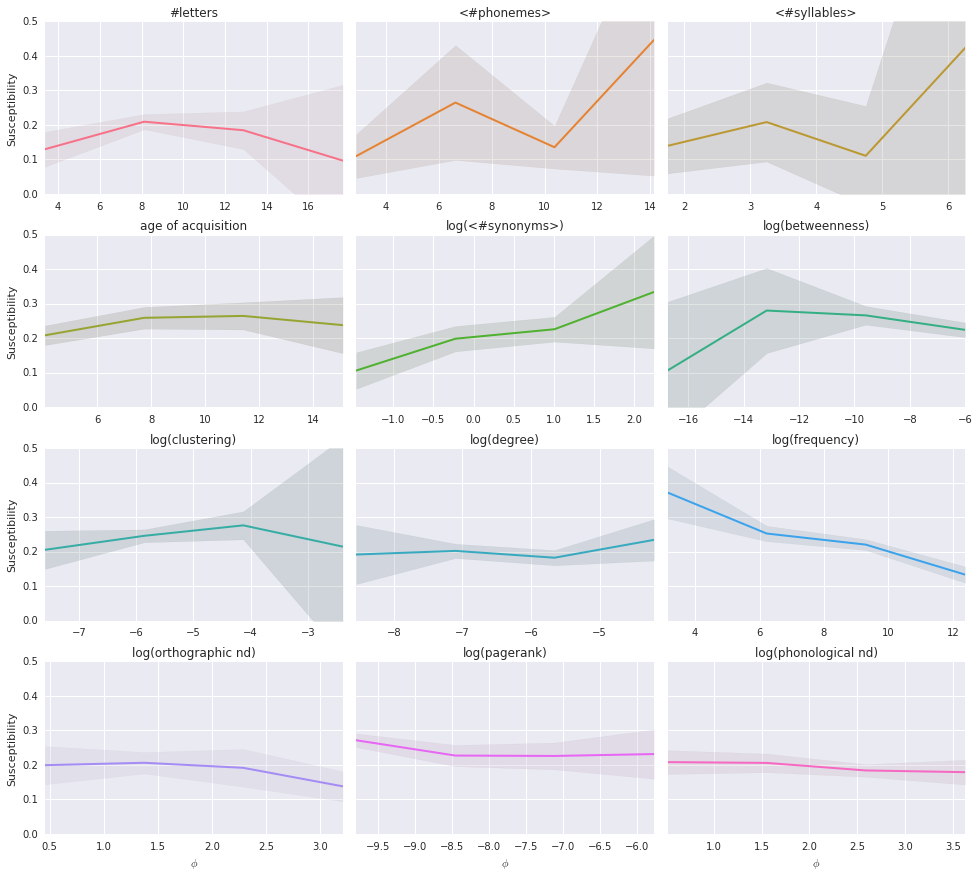

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=susties, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

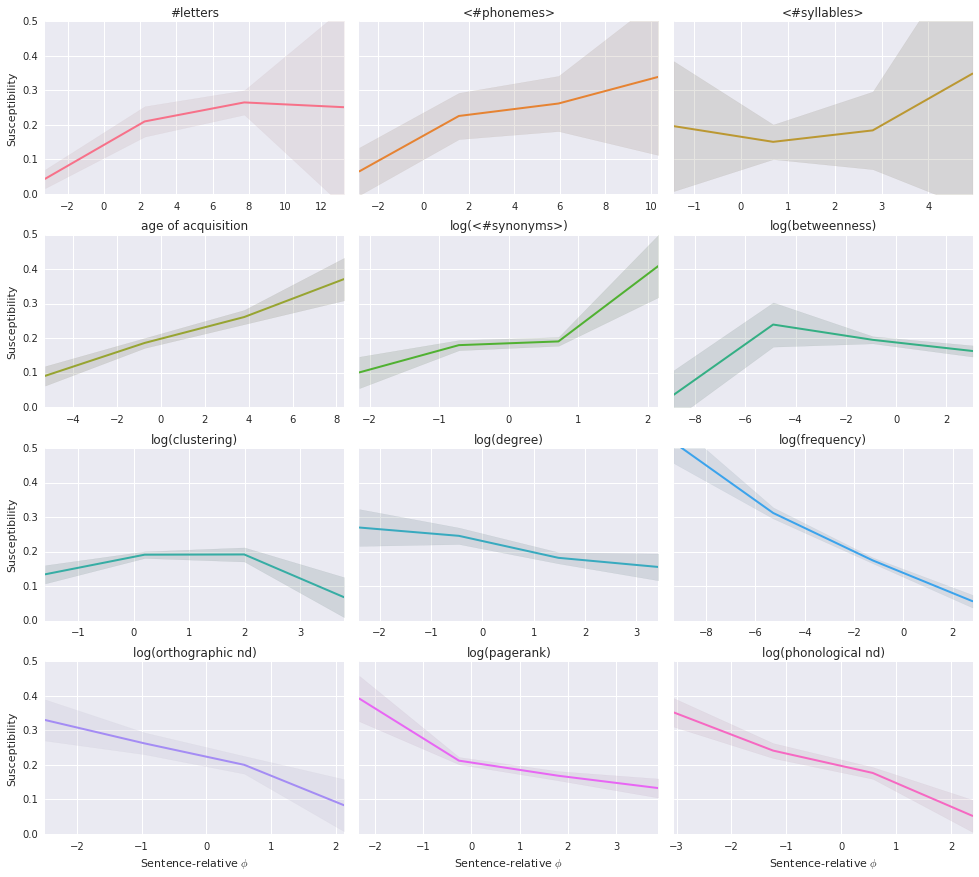

In [8]:
g = sb.FacetGrid(data=susties_rel, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on how confidence intervals are computed here**

There are three ways I can conceive of the computation represented in the graphs above:
1. For each word, we look at how many times it is substituted versus how many times it appears in a position where it could have been substituted. This is the *word*'s susceptibility, $\sigma(w)$. Then for each feature bin $b_i$ we take all the words such that $\phi(w) \in b_i$, average, and compute an asymptotic confidence interval based on how many words are in the bin. This fails for sentence-relative features, because a given word has different feature values depending on the sentence it appears in. So we discard this.
2. Do the same but at the feature value level. So we define a *feature value* susceptibility, $\sigma(f)$, and compute a confidence interval based on how many different feature values we have in the bin. The idea behind (1) and (2) is to look at the bin middle-value like the relevant object we're measuring, and we have several measures for each bin middle-value, hence the confidence interval. This is the way CIs are computed above.
3. Consider that we sample a multinomial process: each substitution is in fact the sampling of a feature value from one of the four bins. In that case, we can compute multinomial proportion CIs. This is also not satisfactory since in most cases not all feature values are available at the time of sampling, since most sentences don't range over all the feature's values. So for now I'm sticking with (2).

### 2.2 Feature susceptibilities, reduced to features we expose in the paper

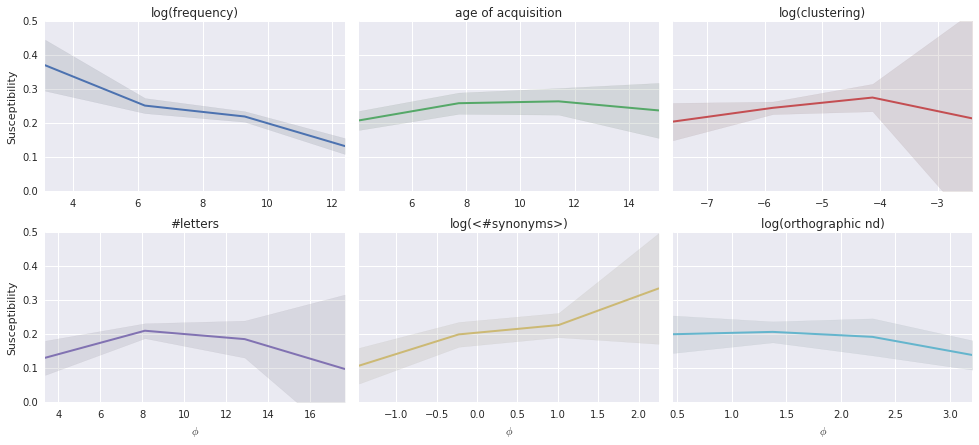

In [9]:
g = sb.FacetGrid(data=susties[susties['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

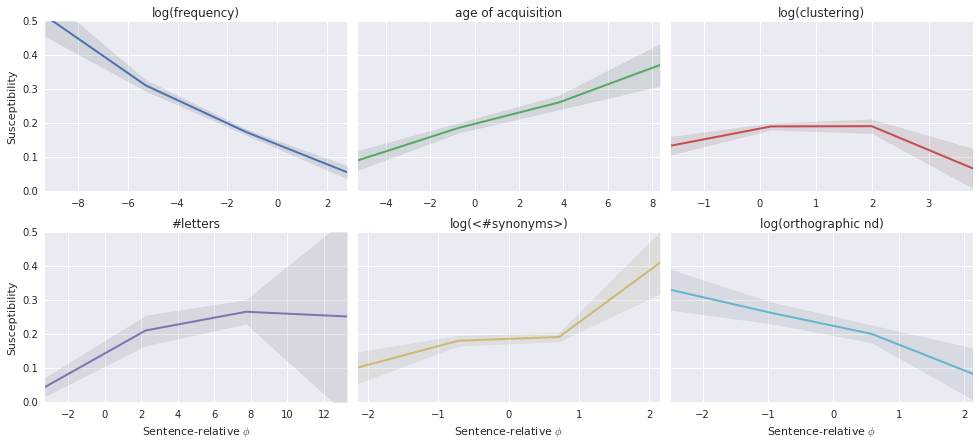

In [10]:
g = sb.FacetGrid(data=susties_rel[susties_rel['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

## 3 On which POS tags do substitutions fall?

In [11]:
poses = susty_words[susty_words.feature == 'aoa'][['POS', 'cluster_id', 'destination_id',
                                                   'occurrence', 'source_id', 'target',
                                                   'weight', 'weight_appeared', 'word']]
# Only take first letter of POS code to denote categories,
# and group stopword-like categories together.
stop_poses = ['C', 'F', 'I', 'M', 'P', 'S', 'U']
poses['rPOS'] = poses['POS']\
    .apply(lambda x: x[0])\
    .apply(lambda x: 'Stopword-like' if x in stop_poses else x)

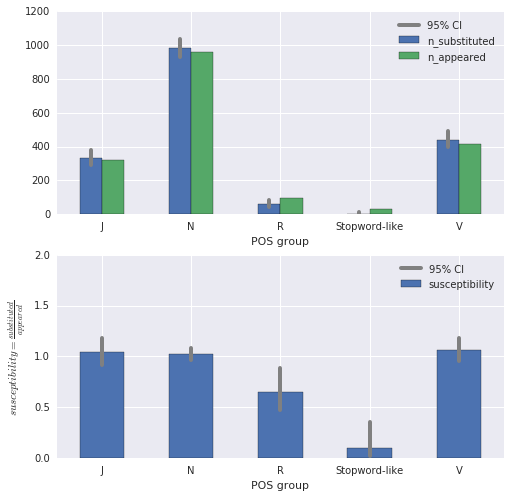

In [12]:
# Compute POS counts.
susty_pos = lambda x: ((x * poses.loc[x.index, 'weight']).sum() /
                       poses.loc[x.index, 'weight_appeared'].sum())
susties_pos = poses.groupby('rPOS')['target'].aggregate(
    {'susceptibility': susty_pos,
     'n_substituted': lambda x: (x * poses.loc[x.index, 'weight']).sum(),
     'n_appeared': lambda x: poses.loc[x.index, 'weight_appeared'].sum()}
).rename_axis('POS group')

# Plot.

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
# Raw substituted and appeared values.
susties_pos[['n_substituted', 'n_appeared']].plot(ax=axes[0], kind='bar', rot=0)
# With their CIs.
total_substituted = susties_pos.n_substituted.sum()
cis = multinomial_proportions_confint(susties_pos.n_substituted.round(), method='goodman')
for i in range(len(susties_pos)):
    axes[0].plot([i-.125, i-.125], cis[i] * total_substituted, lw=4, color='grey',
                 label='95% CI' if i == 0 else None)
axes[0].legend()
# Substitutability values.
susties_pos['susceptibility'].plot(ax=axes[1], kind='bar', legend=True, ylim=(0, 2), rot=0)
axes[1].set_ylabel(r'$susceptibility = \frac{substituted}{appeared}$')
# With their CIs.
for i in range(len(susties_pos)):
    axes[1].plot([i, i], cis[i] * total_substituted / susties_pos.n_appeared.iloc[i],
                 lw=4, color='grey', label='95% CI' if i == 0 else None)
axes[1].legend(loc='best')
# Save if necessary.
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-pos_susceptibilities'),
                bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all POS tags are available to sample from in all the sentences. There's no way out of this, so we're going to use multinomial CIs. We can safely scale all the bars and CIs to their respective `n_appeared` values, since that is an independent given before the sampling.

**Are the appeared and substituted proportions statistically different?**

The only test we can easily do is a multinomial goodness-of-fit. This tells us if the `n_substituted` counts are significantly different from the reference `n_appeared` counts.

From there on we know a few things:
* Comparing a given POS's `n_substituted` count to its reference `n_appeared` count tells us if it's statistically different (< or >). We know this will be true individually for any POS that is out of its confidence region for the global goodness-of-fit test, since it's a weaker hypothesis (so the null rejection region will be wider, and the POS we're looking at is already in the rejection region for the global test). We don't know if it'll be true or not for POSes that are in their confidence region for the global test.
* Jointly comparing two POS's `n_substituted` counts to their reference `n_appeared` counts tells us if there is bias for one w.r.t. the other. This is also true for all pairs of POSes that are on alternate sides of their confidence region in the global test (for the same reasons as in the previous point). We don't know if it's true for the other POSes though.

In [13]:
# Test the n_substituted proportions are different from the n_appeared proportions
total_appeared = susties_pos.n_appeared.sum()
appeared_cis = multinomial_proportions_confint(susties_pos.n_appeared.round(), method='goodman')
differences = [(s < ci[0] * total_appeared) or (s > ci[1] * total_appeared)
               for s, ci in zip(susties_pos.n_substituted, appeared_cis)]
are_different = np.any(differences)
if are_different:
    print("Appeared and substituted proportions are different with p < .05")
    print("The following POS tags are out of their confidence region:",
          list(susties_pos.index[np.where(differences)[0]]))
else:
    print("Appeared and substituted proportions cannot be "
          "said different with p value better than .05")

Appeared and substituted proportions are different with p < .05
The following POS tags are out of their confidence region: ['R', 'Stopword-like']


## 4 Susceptibility in terms of absolute fractiles

In [14]:
def plot_absolute_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')

    # Compute feature bins.
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_fractiles = pd.qcut(data.value, bin_count, labels=False)
            break
        except ValueError:
            pass

    # Compute bin counts
    heights = np.zeros(bin_count)
    for i in range(bin_count):
        heights[i] = data[data.target & (x_fractiles == i)].weight.sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, bin_count + 1), heights, color=color)
    plt.fill_between(range(1, bin_count + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, bin_count + 1))
    plt.xlim(1, bin_count)
    plt.ylim(0, None)

### 4.1 All features susceptibilities

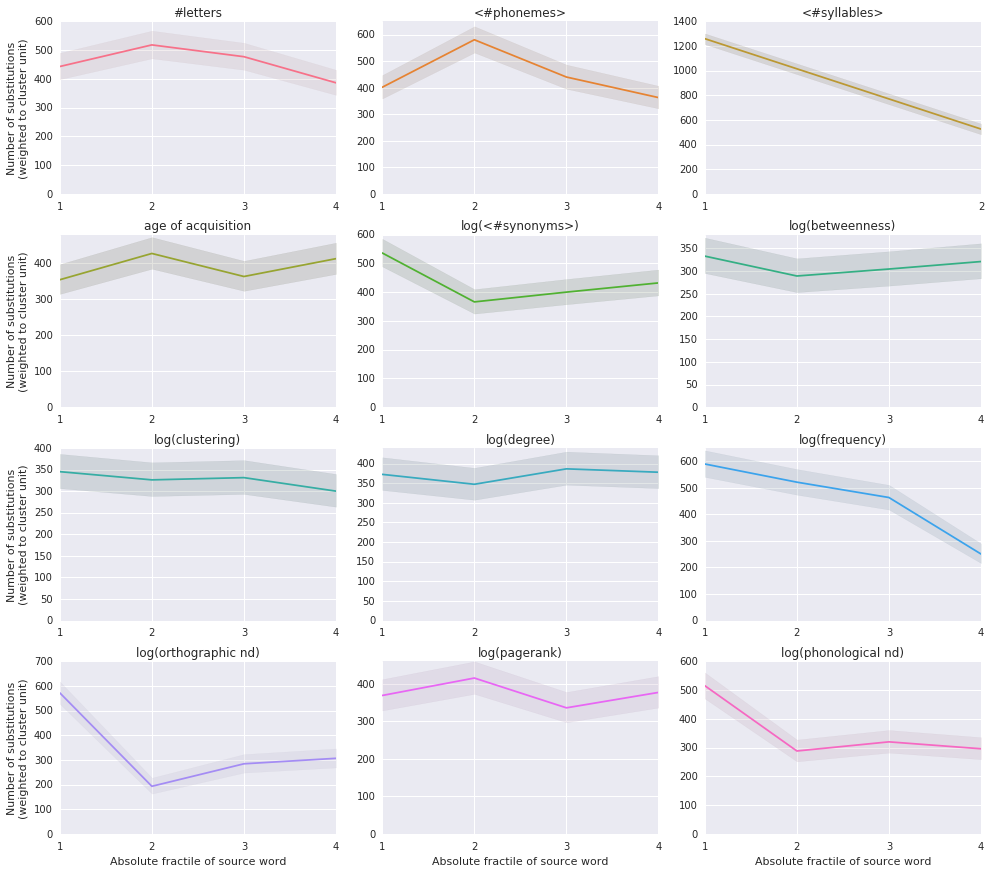

In [15]:
# Now plot.
g = sb.FacetGrid(data=susty_words, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're again in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all absolute feature fractiles are available to sample from in all the sentences. Again, there's no way out of this, so we're going to use multinomial CIs.

### 4.2 Feature susceptibilities, reduced to features we expose in the paper

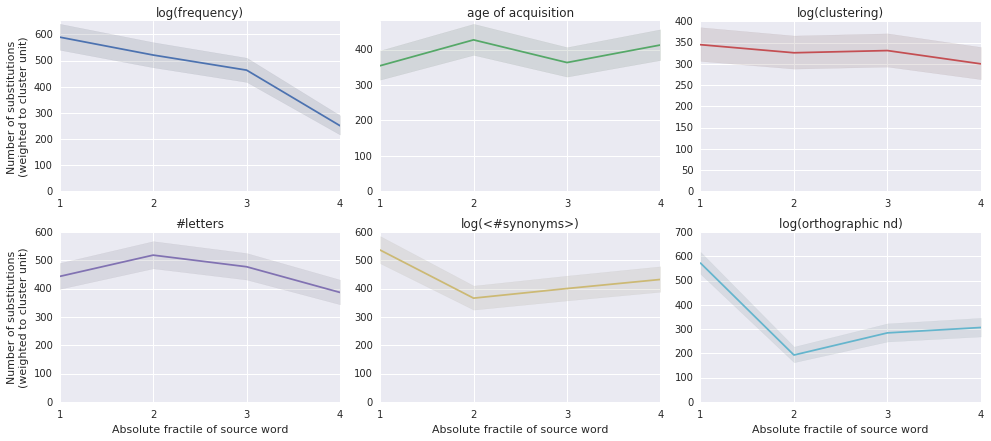

In [16]:
# Now plot.
g = sb.FacetGrid(data=susty_words[susty_words['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

## 5 Susceptibility in terms of sentence fractiles

Build our data.

In [17]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, _ = substitution.features(feature)
            if np.isnan(source):
                # The source word has no feature value. We drop this substitution.
                continue
            sentence, _ = substitution.source_destination_features(feature)
            # Remove stopwords from this analysis, since we dropped substitutions on stopwords.
            dslice = slice(substitution.start,
                           substitution.start + len(substitution.destination.tokens))
            is_stopword = np.array([(lemma in stopwords) or (token in stopwords)
                                    for (lemma, token) in
                                    zip(substitution.source.lemmas[dslice],
                                        substitution.source.tokens[dslice])])
            sentence[is_stopword] = np.nan
            # Find the number of bins we'll use.
            values = set(sentence[np.isfinite(sentence)])
            if len(values) == 0 or len(values) == 1:
                # Only NaNs, or only one feature value. Drop this.
                continue
            start, stop = None, None
            power = 0
            while start is None:
                if int(BIN_COUNT / 2**power) * 2**power != BIN_COUNT:
                    raise ValueError('BIN_COUNT must be a power of 2')
                try:
                    start = 2**power * pd.qcut(sentence, int(BIN_COUNT / 2**power),
                                               labels=False)[substitution.position]
                    stop = start + 2**power
                except ValueError:
                    power += 1
            # And finally save the bin.
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'start': start,
                         'stop': stop})

original_fractiles = pd.DataFrame(data)
del data

  0% (   83 of 53419) |                    | Elapsed Time: 0:00:01 ETA:  0:10:46

  0% (  151 of 53419) |                    | Elapsed Time: 0:00:02 ETA:  0:13:05

  0% (  224 of 53419) |                    | Elapsed Time: 0:00:03 ETA:  0:12:40

  0% (  292 of 53419) |                    | Elapsed Time: 0:00:04 ETA:  0:12:49

  0% (  364 of 53419) |                    | Elapsed Time: 0:00:05 ETA:  0:12:41

  0% (  432 of 53419) |                    | Elapsed Time: 0:00:06 ETA:  0:12:44

  0% (  505 of 53419) |                    | Elapsed Time: 0:00:07 ETA:  0:12:37

  1% (  584 of 53419) |                    | Elapsed Time: 0:00:08 ETA:  0:12:23

  1% (  668 of 53419) |                    | Elapsed Time: 0:00:09 ETA:  0:12:14

  1% (  744 of 53419) |                    | Elapsed Time: 0:00:10 ETA:  0:12:04

  1% (  824 of 53419) |                    | Elapsed Time: 0:00:11 ETA:  0:11:54

  1% (  905 of 53419) |                    | Elapsed Time: 0:00:12 ETA:  0:11:37

  1% (  983 of 53419) |                    | Elapsed Time: 0:00:13 ETA:  0:11:29

  1% ( 1062 of 53419) |                    | Elapsed Time: 0:00:14 ETA:  0:11:16

  2% ( 1134 of 53419) |                    | Elapsed Time: 0:00:15 ETA:  0:11:16

  2% ( 1209 of 53419) |                    | Elapsed Time: 0:00:16 ETA:  0:11:19

  2% ( 1301 of 53419) |                    | Elapsed Time: 0:00:17 ETA:  0:11:01

  2% ( 1336 of 53419) |                    | Elapsed Time: 0:00:17 ETA:  0:10:56

  2% ( 1430 of 53419) |                    | Elapsed Time: 0:00:18 ETA:  0:10:37

  2% ( 1524 of 53419) |                    | Elapsed Time: 0:00:19 ETA:  0:10:23

  3% ( 1614 of 53419) |                    | Elapsed Time: 0:00:20 ETA:  0:10:15

  3% ( 1700 of 53419) |                    | Elapsed Time: 0:00:21 ETA:  0:10:06

  3% ( 1765 of 53419) |                    | Elapsed Time: 0:00:22 ETA:  0:10:18

  3% ( 1833 of 53419) |                    | Elapsed Time: 0:00:23 ETA:  0:10:21

  3% ( 1901 of 53419) |                    | Elapsed Time: 0:00:24 ETA:  0:10:27

  3% ( 1966 of 53419) |                    | Elapsed Time: 0:00:25 ETA:  0:10:52

  3% ( 2004 of 53419) |                    | Elapsed Time: 0:00:26 ETA:  0:11:03

  3% ( 2074 of 53419) |                    | Elapsed Time: 0:00:27 ETA:  0:11:27

  4% ( 2142 of 53419) |                    | Elapsed Time: 0:00:28 ETA:  0:11:56

  4% ( 2205 of 53419) |                    | Elapsed Time: 0:00:29 ETA:  0:12:28

  4% ( 2268 of 53419) |                    | Elapsed Time: 0:00:30 ETA:  0:13:00

  4% ( 2328 of 53419) |                    | Elapsed Time: 0:00:31 ETA:  0:13:06

  4% ( 2390 of 53419) |                    | Elapsed Time: 0:00:32 ETA:  0:13:13

  4% ( 2457 of 53419) |                    | Elapsed Time: 0:00:33 ETA:  0:13:13

  4% ( 2530 of 53419) |                    | Elapsed Time: 0:00:34 ETA:  0:13:01

  4% ( 2605 of 53419) |                    | Elapsed Time: 0:00:35 ETA:  0:12:49

  5% ( 2671 of 53419) |#                   | Elapsed Time: 0:00:36 ETA:  0:13:05

  5% ( 2729 of 53419) |#                   | Elapsed Time: 0:00:37 ETA:  0:13:12

  5% ( 2790 of 53419) |#                   | Elapsed Time: 0:00:38 ETA:  0:13:13

  5% ( 2855 of 53419) |#                   | Elapsed Time: 0:00:39 ETA:  0:13:05

  5% ( 2920 of 53419) |#                   | Elapsed Time: 0:00:40 ETA:  0:13:00

  5% ( 3002 of 53419) |#                   | Elapsed Time: 0:00:41 ETA:  0:12:37

  5% ( 3083 of 53419) |#                   | Elapsed Time: 0:00:42 ETA:  0:12:24

  5% ( 3153 of 53419) |#                   | Elapsed Time: 0:00:43 ETA:  0:12:31

  6% ( 3221 of 53419) |#                   | Elapsed Time: 0:00:44 ETA:  0:12:18

  6% ( 3290 of 53419) |#                   | Elapsed Time: 0:00:45 ETA:  0:12:17

  6% ( 3339 of 53419) |#                   | Elapsed Time: 0:00:46 ETA:  0:12:01

  6% ( 3409 of 53419) |#                   | Elapsed Time: 0:00:47 ETA:  0:11:48

  6% ( 3478 of 53419) |#                   | Elapsed Time: 0:00:48 ETA:  0:11:43

  6% ( 3553 of 53419) |#                   | Elapsed Time: 0:00:49 ETA:  0:11:30

  6% ( 3625 of 53419) |#                   | Elapsed Time: 0:00:50 ETA:  0:11:41

  6% ( 3700 of 53419) |#                   | Elapsed Time: 0:00:51 ETA:  0:11:47

  7% ( 3782 of 53419) |#                   | Elapsed Time: 0:00:52 ETA:  0:11:31

  7% ( 3853 of 53419) |#                   | Elapsed Time: 0:00:53 ETA:  0:11:27

  7% ( 3922 of 53419) |#                   | Elapsed Time: 0:00:54 ETA:  0:11:26

  7% ( 4007 of 53419) |#                   | Elapsed Time: 0:00:55 ETA:  0:11:02

  7% ( 4083 of 53419) |#                   | Elapsed Time: 0:00:56 ETA:  0:10:55

  7% ( 4171 of 53419) |#                   | Elapsed Time: 0:00:57 ETA:  0:10:34

  7% ( 4254 of 53419) |#                   | Elapsed Time: 0:00:58 ETA:  0:10:26

  8% ( 4326 of 53419) |#                   | Elapsed Time: 0:00:59 ETA:  0:10:24

  8% ( 4400 of 53419) |#                   | Elapsed Time: 0:01:00 ETA:  0:10:24

  8% ( 4473 of 53419) |#                   | Elapsed Time: 0:01:01 ETA:  0:10:32

  8% ( 4545 of 53419) |#                   | Elapsed Time: 0:01:02 ETA:  0:10:29

  8% ( 4619 of 53419) |#                   | Elapsed Time: 0:01:03 ETA:  0:10:23

  8% ( 4675 of 53419) |#                   | Elapsed Time: 0:01:03 ETA:  0:10:40

  8% ( 4753 of 53419) |#                   | Elapsed Time: 0:01:04 ETA:  0:10:36

  9% ( 4866 of 53419) |#                   | Elapsed Time: 0:01:05 ETA:  0:10:10

  9% ( 4944 of 53419) |#                   | Elapsed Time: 0:01:06 ETA:  0:10:13

  9% ( 5016 of 53419) |#                   | Elapsed Time: 0:01:07 ETA:  0:10:12

  9% ( 5092 of 53419) |#                   | Elapsed Time: 0:01:08 ETA:  0:10:09

  9% ( 5167 of 53419) |#                   | Elapsed Time: 0:01:09 ETA:  0:10:07

  9% ( 5240 of 53419) |#                   | Elapsed Time: 0:01:10 ETA:  0:10:05

  9% ( 5314 of 53419) |#                   | Elapsed Time: 0:01:11 ETA:  0:10:05

 10% ( 5342 of 53419) |##                  | Elapsed Time: 0:01:12 ETA:  0:10:03

 10% ( 5418 of 53419) |##                  | Elapsed Time: 0:01:13 ETA:  0:10:04

 10% ( 5493 of 53419) |##                  | Elapsed Time: 0:01:14 ETA:  0:10:44

 10% ( 5567 of 53419) |##                  | Elapsed Time: 0:01:15 ETA:  0:10:48

 10% ( 5641 of 53419) |##                  | Elapsed Time: 0:01:16 ETA:  0:10:44

 10% ( 5716 of 53419) |##                  | Elapsed Time: 0:01:17 ETA:  0:10:44

 10% ( 5791 of 53419) |##                  | Elapsed Time: 0:01:18 ETA:  0:10:43

 10% ( 5867 of 53419) |##                  | Elapsed Time: 0:01:19 ETA:  0:10:40

 11% ( 5945 of 53419) |##                  | Elapsed Time: 0:01:20 ETA:  0:10:34

 11% ( 6010 of 53419) |##                  | Elapsed Time: 0:01:21 ETA:  0:10:28

 11% ( 6085 of 53419) |##                  | Elapsed Time: 0:01:22 ETA:  0:10:28

 11% ( 6160 of 53419) |##                  | Elapsed Time: 0:01:23 ETA:  0:10:28

 11% ( 6233 of 53419) |##                  | Elapsed Time: 0:01:24 ETA:  0:10:29

 11% ( 6306 of 53419) |##                  | Elapsed Time: 0:01:25 ETA:  0:10:30

 11% ( 6378 of 53419) |##                  | Elapsed Time: 0:01:26 ETA:  0:10:31

 12% ( 6452 of 53419) |##                  | Elapsed Time: 0:01:27 ETA:  0:10:31

 12% ( 6526 of 53419) |##                  | Elapsed Time: 0:01:28 ETA:  0:10:32

 12% ( 6610 of 53419) |##                  | Elapsed Time: 0:01:29 ETA:  0:10:24

 12% ( 6678 of 53419) |##                  | Elapsed Time: 0:01:30 ETA:  0:10:22

 12% ( 6762 of 53419) |##                  | Elapsed Time: 0:01:31 ETA:  0:10:11

 12% ( 6841 of 53419) |##                  | Elapsed Time: 0:01:32 ETA:  0:10:06

 12% ( 6922 of 53419) |##                  | Elapsed Time: 0:01:33 ETA:  0:09:57

 13% ( 7011 of 53419) |##                  | Elapsed Time: 0:01:34 ETA:  0:09:40

 13% ( 7095 of 53419) |##                  | Elapsed Time: 0:01:35 ETA:  0:09:28

 13% ( 7174 of 53419) |##                  | Elapsed Time: 0:01:36 ETA:  0:09:22

 13% ( 7253 of 53419) |##                  | Elapsed Time: 0:01:37 ETA:  0:09:16

 13% ( 7346 of 53419) |##                  | Elapsed Time: 0:01:38 ETA:  0:09:21

 13% ( 7426 of 53419) |##                  | Elapsed Time: 0:01:39 ETA:  0:09:24

 14% ( 7498 of 53419) |##                  | Elapsed Time: 0:01:40 ETA:  0:09:31

 14% ( 7568 of 53419) |##                  | Elapsed Time: 0:01:41 ETA:  0:09:41

 14% ( 7640 of 53419) |##                  | Elapsed Time: 0:01:42 ETA:  0:09:59

 14% ( 7710 of 53419) |##                  | Elapsed Time: 0:01:43 ETA:  0:10:14

 14% ( 7779 of 53419) |##                  | Elapsed Time: 0:01:44 ETA:  0:10:25

 14% ( 7850 of 53419) |##                  | Elapsed Time: 0:01:45 ETA:  0:10:35

 14% ( 7930 of 53419) |##                  | Elapsed Time: 0:01:46 ETA:  0:10:30

 15% ( 8013 of 53419) |###                 | Elapsed Time: 0:01:47 ETA:  0:10:39

 15% ( 8092 of 53419) |###                 | Elapsed Time: 0:01:48 ETA:  0:10:28

 15% ( 8169 of 53419) |###                 | Elapsed Time: 0:01:49 ETA:  0:10:19

 15% ( 8249 of 53419) |###                 | Elapsed Time: 0:01:50 ETA:  0:10:08

 15% ( 8321 of 53419) |###                 | Elapsed Time: 0:01:51 ETA:  0:10:05

 15% ( 8394 of 53419) |###                 | Elapsed Time: 0:01:52 ETA:  0:09:58

 15% ( 8471 of 53419) |###                 | Elapsed Time: 0:01:53 ETA:  0:09:50

 16% ( 8549 of 53419) |###                 | Elapsed Time: 0:01:54 ETA:  0:09:51

 16% ( 8634 of 53419) |###                 | Elapsed Time: 0:01:55 ETA:  0:09:38

 16% ( 8681 of 53419) |###                 | Elapsed Time: 0:01:56 ETA:  0:09:34

 16% ( 8762 of 53419) |###                 | Elapsed Time: 0:01:57 ETA:  0:09:31

 16% ( 8847 of 53419) |###                 | Elapsed Time: 0:01:58 ETA:  0:09:21

 16% ( 8926 of 53419) |###                 | Elapsed Time: 0:01:59 ETA:  0:09:21

 16% ( 9001 of 53419) |###                 | Elapsed Time: 0:02:00 ETA:  0:09:17

 17% ( 9082 of 53419) |###                 | Elapsed Time: 0:02:01 ETA:  0:09:08

 17% ( 9162 of 53419) |###                 | Elapsed Time: 0:02:02 ETA:  0:09:04

 17% ( 9241 of 53419) |###                 | Elapsed Time: 0:02:03 ETA:  0:09:02

 17% ( 9324 of 53419) |###                 | Elapsed Time: 0:02:04 ETA:  0:09:03

 17% ( 9349 of 53419) |###                 | Elapsed Time: 0:02:04 ETA:  0:09:03

 17% ( 9434 of 53419) |###                 | Elapsed Time: 0:02:05 ETA:  0:08:58

 17% ( 9516 of 53419) |###                 | Elapsed Time: 0:02:06 ETA:  0:09:00

 17% ( 9600 of 53419) |###                 | Elapsed Time: 0:02:07 ETA:  0:08:55

 18% ( 9685 of 53419) |###                 | Elapsed Time: 0:02:08 ETA:  0:08:44

 18% ( 9769 of 53419) |###                 | Elapsed Time: 0:02:09 ETA:  0:08:40

 18% ( 9850 of 53419) |###                 | Elapsed Time: 0:02:10 ETA:  0:08:38

 18% ( 9937 of 53419) |###                 | Elapsed Time: 0:02:11 ETA:  0:08:29

 18% (10017 of 53419) |###                 | Elapsed Time: 0:02:12 ETA:  0:08:29

 18% (10103 of 53419) |###                 | Elapsed Time: 0:02:13 ETA:  0:08:26

 19% (10186 of 53419) |###                 | Elapsed Time: 0:02:14 ETA:  0:08:26

 19% (10270 of 53419) |###                 | Elapsed Time: 0:02:15 ETA:  0:08:23

 19% (10356 of 53419) |###                 | Elapsed Time: 0:02:16 ETA:  0:08:20

 19% (10440 of 53419) |###                 | Elapsed Time: 0:02:17 ETA:  0:08:21

 19% (10527 of 53419) |###                 | Elapsed Time: 0:02:18 ETA:  0:08:17

 19% (10614 of 53419) |###                 | Elapsed Time: 0:02:19 ETA:  0:08:11

 20% (10684 of 53419) |####                | Elapsed Time: 0:02:20 ETA:  0:08:11

 20% (10768 of 53419) |####                | Elapsed Time: 0:02:21 ETA:  0:08:09

 20% (10852 of 53419) |####                | Elapsed Time: 0:02:22 ETA:  0:08:10

 20% (10932 of 53419) |####                | Elapsed Time: 0:02:23 ETA:  0:08:12

 20% (11015 of 53419) |####                | Elapsed Time: 0:02:24 ETA:  0:08:11

 20% (11099 of 53419) |####                | Elapsed Time: 0:02:25 ETA:  0:08:12

 20% (11184 of 53419) |####                | Elapsed Time: 0:02:26 ETA:  0:08:11

 21% (11271 of 53419) |####                | Elapsed Time: 0:02:27 ETA:  0:08:09

 21% (11352 of 53419) |####                | Elapsed Time: 0:02:28 ETA:  0:08:13

 21% (11438 of 53419) |####                | Elapsed Time: 0:02:29 ETA:  0:08:11

 21% (11524 of 53419) |####                | Elapsed Time: 0:02:30 ETA:  0:08:08

 21% (11609 of 53419) |####                | Elapsed Time: 0:02:31 ETA:  0:08:06

 21% (11694 of 53419) |####                | Elapsed Time: 0:02:32 ETA:  0:08:01

 22% (11773 of 53419) |####                | Elapsed Time: 0:02:33 ETA:  0:08:04

 22% (11859 of 53419) |####                | Elapsed Time: 0:02:34 ETA:  0:08:01

 22% (11945 of 53419) |####                | Elapsed Time: 0:02:35 ETA:  0:07:58

 22% (12020 of 53419) |####                | Elapsed Time: 0:02:36 ETA:  0:08:00

 22% (12094 of 53419) |####                | Elapsed Time: 0:02:37 ETA:  0:08:06

 22% (12164 of 53419) |####                | Elapsed Time: 0:02:38 ETA:  0:08:19

 22% (12235 of 53419) |####                | Elapsed Time: 0:02:39 ETA:  0:08:32

 23% (12305 of 53419) |####                | Elapsed Time: 0:02:40 ETA:  0:08:46

 23% (12375 of 53419) |####                | Elapsed Time: 0:02:41 ETA:  0:09:00

 23% (12444 of 53419) |####                | Elapsed Time: 0:02:42 ETA:  0:09:09

 23% (12516 of 53419) |####                | Elapsed Time: 0:02:45 ETA:  0:12:25

 23% (12594 of 53419) |####                | Elapsed Time: 0:02:46 ETA:  0:12:36

 23% (12666 of 53419) |####                | Elapsed Time: 0:02:47 ETA:  0:12:49

 23% (12688 of 53419) |####                | Elapsed Time: 0:02:48 ETA:  0:13:06

 23% (12770 of 53419) |####                | Elapsed Time: 0:02:49 ETA:  0:12:47

 24% (12839 of 53419) |####                | Elapsed Time: 0:02:50 ETA:  0:12:48

 24% (12903 of 53419) |####                | Elapsed Time: 0:02:51 ETA:  0:12:57

 24% (12965 of 53419) |####                | Elapsed Time: 0:02:52 ETA:  0:13:08

 24% (13028 of 53419) |####                | Elapsed Time: 0:02:53 ETA:  0:13:17

 24% (13093 of 53419) |####                | Elapsed Time: 0:02:54 ETA:  0:09:58

 24% (13163 of 53419) |####                | Elapsed Time: 0:02:55 ETA:  0:10:07

 24% (13241 of 53419) |####                | Elapsed Time: 0:02:56 ETA:  0:09:59

 24% (13316 of 53419) |####                | Elapsed Time: 0:02:57 ETA:  0:09:54

 25% (13355 of 53419) |#####               | Elapsed Time: 0:02:57 ETA:  0:10:02

 25% (13431 of 53419) |#####               | Elapsed Time: 0:02:58 ETA:  0:09:52

 25% (13511 of 53419) |#####               | Elapsed Time: 0:02:59 ETA:  0:09:31

 25% (13589 of 53419) |#####               | Elapsed Time: 0:03:00 ETA:  0:09:11

 25% (13667 of 53419) |#####               | Elapsed Time: 0:03:01 ETA:  0:08:52

 25% (13748 of 53419) |#####               | Elapsed Time: 0:03:02 ETA:  0:08:33

 25% (13816 of 53419) |#####               | Elapsed Time: 0:03:03 ETA:  0:08:36

 25% (13878 of 53419) |#####               | Elapsed Time: 0:03:04 ETA:  0:08:52

 26% (13943 of 53419) |#####               | Elapsed Time: 0:03:05 ETA:  0:09:02

 26% (14023 of 53419) |#####               | Elapsed Time: 0:03:06 ETA:  0:08:50

 26% (14103 of 53419) |#####               | Elapsed Time: 0:03:07 ETA:  0:08:45

 26% (14188 of 53419) |#####               | Elapsed Time: 0:03:08 ETA:  0:08:38

 26% (14271 of 53419) |#####               | Elapsed Time: 0:03:09 ETA:  0:08:32

 26% (14343 of 53419) |#####               | Elapsed Time: 0:03:10 ETA:  0:08:38

 26% (14416 of 53419) |#####               | Elapsed Time: 0:03:11 ETA:  0:08:45

 27% (14490 of 53419) |#####               | Elapsed Time: 0:03:12 ETA:  0:08:37

 27% (14564 of 53419) |#####               | Elapsed Time: 0:03:13 ETA:  0:08:24

 27% (14633 of 53419) |#####               | Elapsed Time: 0:03:14 ETA:  0:08:20

 27% (14691 of 53419) |#####               | Elapsed Time: 0:03:15 ETA:  0:08:34

 27% (14780 of 53419) |#####               | Elapsed Time: 0:03:16 ETA:  0:08:24

 27% (14861 of 53419) |#####               | Elapsed Time: 0:03:17 ETA:  0:08:27

 27% (14934 of 53419) |#####               | Elapsed Time: 0:03:18 ETA:  0:08:36

 28% (15001 of 53419) |#####               | Elapsed Time: 0:03:19 ETA:  0:08:42

 28% (15063 of 53419) |#####               | Elapsed Time: 0:03:20 ETA:  0:08:54

 28% (15126 of 53419) |#####               | Elapsed Time: 0:03:21 ETA:  0:09:06

 28% (15187 of 53419) |#####               | Elapsed Time: 0:03:22 ETA:  0:09:19

 28% (15254 of 53419) |#####               | Elapsed Time: 0:03:23 ETA:  0:09:21

 28% (15317 of 53419) |#####               | Elapsed Time: 0:03:24 ETA:  0:09:30

 28% (15358 of 53419) |#####               | Elapsed Time: 0:03:25 ETA:  0:09:50

 28% (15439 of 53419) |#####               | Elapsed Time: 0:03:26 ETA:  0:09:49

 29% (15513 of 53419) |#####               | Elapsed Time: 0:03:27 ETA:  0:09:47

 29% (15594 of 53419) |#####               | Elapsed Time: 0:03:28 ETA:  0:09:25

 29% (15663 of 53419) |#####               | Elapsed Time: 0:03:29 ETA:  0:09:14

 29% (15734 of 53419) |#####               | Elapsed Time: 0:03:30 ETA:  0:09:03

 29% (15805 of 53419) |#####               | Elapsed Time: 0:03:31 ETA:  0:08:49

 29% (15877 of 53419) |#####               | Elapsed Time: 0:03:32 ETA:  0:08:42

 29% (15960 of 53419) |#####               | Elapsed Time: 0:03:33 ETA:  0:08:18

 30% (16026 of 53419) |######              | Elapsed Time: 0:03:33 ETA:  0:08:04

 30% (16118 of 53419) |######              | Elapsed Time: 0:03:34 ETA:  0:07:52

 30% (16206 of 53419) |######              | Elapsed Time: 0:03:35 ETA:  0:07:37

 30% (16295 of 53419) |######              | Elapsed Time: 0:03:36 ETA:  0:07:29

 30% (16369 of 53419) |######              | Elapsed Time: 0:03:37 ETA:  0:07:23

 30% (16477 of 53419) |######              | Elapsed Time: 0:03:38 ETA:  0:06:49

 31% (16581 of 53419) |######              | Elapsed Time: 0:03:39 ETA:  0:06:22

 31% (16654 of 53419) |######              | Elapsed Time: 0:03:40 ETA:  0:06:20

 31% (16694 of 53419) |######              | Elapsed Time: 0:03:41 ETA:  0:06:04

 31% (16789 of 53419) |######              | Elapsed Time: 0:03:42 ETA:  0:06:02

 31% (16881 of 53419) |######              | Elapsed Time: 0:03:43 ETA:  0:06:01

 31% (16966 of 53419) |######              | Elapsed Time: 0:03:44 ETA:  0:06:03

 31% (17041 of 53419) |######              | Elapsed Time: 0:03:45 ETA:  0:06:13

 32% (17136 of 53419) |######              | Elapsed Time: 0:03:46 ETA:  0:05:56

 32% (17213 of 53419) |######              | Elapsed Time: 0:03:47 ETA:  0:06:21

 32% (17292 of 53419) |######              | Elapsed Time: 0:03:48 ETA:  0:06:41

 32% (17362 of 53419) |######              | Elapsed Time: 0:03:49 ETA:  0:07:02

 32% (17432 of 53419) |######              | Elapsed Time: 0:03:50 ETA:  0:07:25

 32% (17504 of 53419) |######              | Elapsed Time: 0:03:51 ETA:  0:07:46

 32% (17575 of 53419) |######              | Elapsed Time: 0:03:52 ETA:  0:08:01

 33% (17652 of 53419) |######              | Elapsed Time: 0:03:53 ETA:  0:07:58

 33% (17759 of 53419) |######              | Elapsed Time: 0:03:54 ETA:  0:07:43

 33% (17821 of 53419) |######              | Elapsed Time: 0:03:55 ETA:  0:08:00

 33% (17879 of 53419) |######              | Elapsed Time: 0:03:56 ETA:  0:08:25

 33% (17968 of 53419) |######              | Elapsed Time: 0:03:57 ETA:  0:07:53

 33% (18029 of 53419) |######              | Elapsed Time: 0:03:57 ETA:  0:07:31

 33% (18121 of 53419) |######              | Elapsed Time: 0:03:58 ETA:  0:07:08

 34% (18183 of 53419) |######              | Elapsed Time: 0:03:59 ETA:  0:07:16

 34% (18264 of 53419) |######              | Elapsed Time: 0:04:00 ETA:  0:07:06

 34% (18337 of 53419) |######              | Elapsed Time: 0:04:01 ETA:  0:07:08

 34% (18407 of 53419) |######              | Elapsed Time: 0:04:02 ETA:  0:07:44

 34% (18474 of 53419) |######              | Elapsed Time: 0:04:03 ETA:  0:07:37

 34% (18551 of 53419) |######              | Elapsed Time: 0:04:04 ETA:  0:07:17

 34% (18643 of 53419) |######              | Elapsed Time: 0:04:05 ETA:  0:07:13

 35% (18697 of 53419) |#######             | Elapsed Time: 0:04:06 ETA:  0:07:20

 35% (18790 of 53419) |#######             | Elapsed Time: 0:04:07 ETA:  0:07:18

 35% (18888 of 53419) |#######             | Elapsed Time: 0:04:08 ETA:  0:06:42

 35% (18967 of 53419) |#######             | Elapsed Time: 0:04:09 ETA:  0:06:43

 35% (19038 of 53419) |#######             | Elapsed Time: 0:04:10 ETA:  0:06:45

 35% (19101 of 53419) |#######             | Elapsed Time: 0:04:11 ETA:  0:06:51

 35% (19171 of 53419) |#######             | Elapsed Time: 0:04:12 ETA:  0:06:47

 36% (19239 of 53419) |#######             | Elapsed Time: 0:04:13 ETA:  0:06:55

 36% (19299 of 53419) |#######             | Elapsed Time: 0:04:14 ETA:  0:07:27

 36% (19365 of 53419) |#######             | Elapsed Time: 0:04:15 ETA:  0:07:46

 36% (19443 of 53419) |#######             | Elapsed Time: 0:04:16 ETA:  0:08:02

 36% (19519 of 53419) |#######             | Elapsed Time: 0:04:17 ETA:  0:08:27

 36% (19593 of 53419) |#######             | Elapsed Time: 0:04:18 ETA:  0:08:31

 36% (19662 of 53419) |#######             | Elapsed Time: 0:04:19 ETA:  0:08:33

 36% (19734 of 53419) |#######             | Elapsed Time: 0:04:20 ETA:  0:08:21

 37% (19800 of 53419) |#######             | Elapsed Time: 0:04:21 ETA:  0:08:24

 37% (19882 of 53419) |#######             | Elapsed Time: 0:04:22 ETA:  0:08:06

 37% (19979 of 53419) |#######             | Elapsed Time: 0:04:23 ETA:  0:07:23

 37% (20033 of 53419) |#######             | Elapsed Time: 0:04:24 ETA:  0:07:14

 37% (20107 of 53419) |#######             | Elapsed Time: 0:04:25 ETA:  0:07:17

 37% (20180 of 53419) |#######             | Elapsed Time: 0:04:26 ETA:  0:07:20

 37% (20244 of 53419) |#######             | Elapsed Time: 0:04:27 ETA:  0:07:30

 38% (20315 of 53419) |#######             | Elapsed Time: 0:04:28 ETA:  0:07:27

 38% (20380 of 53419) |#######             | Elapsed Time: 0:04:29 ETA:  0:07:34

 38% (20446 of 53419) |#######             | Elapsed Time: 0:04:30 ETA:  0:07:34

 38% (20541 of 53419) |#######             | Elapsed Time: 0:04:31 ETA:  0:07:19

 38% (20623 of 53419) |#######             | Elapsed Time: 0:04:32 ETA:  0:07:35

 38% (20700 of 53419) |#######             | Elapsed Time: 0:04:33 ETA:  0:07:23

 38% (20788 of 53419) |#######             | Elapsed Time: 0:04:34 ETA:  0:07:08

 39% (20870 of 53419) |#######             | Elapsed Time: 0:04:35 ETA:  0:06:57

 39% (20951 of 53419) |#######             | Elapsed Time: 0:04:36 ETA:  0:06:40

 39% (21019 of 53419) |#######             | Elapsed Time: 0:04:37 ETA:  0:06:41

 39% (21081 of 53419) |#######             | Elapsed Time: 0:04:38 ETA:  0:06:43

 39% (21148 of 53419) |#######             | Elapsed Time: 0:04:39 ETA:  0:06:40

 39% (21224 of 53419) |#######             | Elapsed Time: 0:04:40 ETA:  0:06:58

 39% (21305 of 53419) |#######             | Elapsed Time: 0:04:41 ETA:  0:06:58

 40% (21368 of 53419) |########            | Elapsed Time: 0:04:42 ETA:  0:07:09

 40% (21458 of 53419) |########            | Elapsed Time: 0:04:43 ETA:  0:07:06

 40% (21558 of 53419) |########            | Elapsed Time: 0:04:44 ETA:  0:06:46

 40% (21646 of 53419) |########            | Elapsed Time: 0:04:45 ETA:  0:06:38

 40% (21721 of 53419) |########            | Elapsed Time: 0:04:46 ETA:  0:06:30

 40% (21801 of 53419) |########            | Elapsed Time: 0:04:47 ETA:  0:06:12

 40% (21879 of 53419) |########            | Elapsed Time: 0:04:48 ETA:  0:06:01

 41% (21955 of 53419) |########            | Elapsed Time: 0:04:49 ETA:  0:06:00

 41% (22036 of 53419) |########            | Elapsed Time: 0:04:50 ETA:  0:06:02

 41% (22110 of 53419) |########            | Elapsed Time: 0:04:51 ETA:  0:06:17

 41% (22217 of 53419) |########            | Elapsed Time: 0:04:52 ETA:  0:06:09

 41% (22325 of 53419) |########            | Elapsed Time: 0:04:53 ETA:  0:05:49

 41% (22398 of 53419) |########            | Elapsed Time: 0:04:54 ETA:  0:05:51

 42% (22469 of 53419) |########            | Elapsed Time: 0:04:55 ETA:  0:05:59

 42% (22534 of 53419) |########            | Elapsed Time: 0:04:56 ETA:  0:06:11

 42% (22602 of 53419) |########            | Elapsed Time: 0:04:57 ETA:  0:06:18

 42% (22667 of 53419) |########            | Elapsed Time: 0:04:58 ETA:  0:06:24

 42% (22704 of 53419) |########            | Elapsed Time: 0:04:58 ETA:  0:06:30

 42% (22771 of 53419) |########            | Elapsed Time: 0:04:59 ETA:  0:06:36

 42% (22845 of 53419) |########            | Elapsed Time: 0:05:00 ETA:  0:07:11

 42% (22939 of 53419) |########            | Elapsed Time: 0:05:01 ETA:  0:07:26

 43% (23029 of 53419) |########            | Elapsed Time: 0:05:02 ETA:  0:07:04

 43% (23110 of 53419) |########            | Elapsed Time: 0:05:03 ETA:  0:06:51

 43% (23205 of 53419) |########            | Elapsed Time: 0:05:04 ETA:  0:06:18

 43% (23293 of 53419) |########            | Elapsed Time: 0:05:05 ETA:  0:05:58

 43% (23371 of 53419) |########            | Elapsed Time: 0:05:06 ETA:  0:05:31

 43% (23444 of 53419) |########            | Elapsed Time: 0:05:07 ETA:  0:05:31

 44% (23519 of 53419) |########            | Elapsed Time: 0:05:08 ETA:  0:05:23

 44% (23591 of 53419) |########            | Elapsed Time: 0:05:09 ETA:  0:05:25

 44% (23683 of 53419) |########            | Elapsed Time: 0:05:10 ETA:  0:05:26

 44% (23762 of 53419) |########            | Elapsed Time: 0:05:11 ETA:  0:05:35

 44% (23835 of 53419) |########            | Elapsed Time: 0:05:12 ETA:  0:05:41

 44% (23919 of 53419) |########            | Elapsed Time: 0:05:13 ETA:  0:05:50

 44% (24005 of 53419) |########            | Elapsed Time: 0:05:14 ETA:  0:05:51

 45% (24039 of 53419) |#########           | Elapsed Time: 0:05:15 ETA:  0:06:05

 45% (24106 of 53419) |#########           | Elapsed Time: 0:05:16 ETA:  0:06:10

 45% (24173 of 53419) |#########           | Elapsed Time: 0:05:17 ETA:  0:06:19

 45% (24236 of 53419) |#########           | Elapsed Time: 0:05:18 ETA:  0:06:27

 45% (24319 of 53419) |#########           | Elapsed Time: 0:05:19 ETA:  0:06:37

 45% (24379 of 53419) |#########           | Elapsed Time: 0:05:20 ETA:  0:06:58

 45% (24437 of 53419) |#########           | Elapsed Time: 0:05:21 ETA:  0:07:15

 45% (24497 of 53419) |#########           | Elapsed Time: 0:05:22 ETA:  0:07:45

 46% (24578 of 53419) |#########           | Elapsed Time: 0:05:23 ETA:  0:07:51

 46% (24644 of 53419) |#########           | Elapsed Time: 0:05:24 ETA:  0:07:57

 46% (24707 of 53419) |#########           | Elapsed Time: 0:05:25 ETA:  0:07:42

 46% (24773 of 53419) |#########           | Elapsed Time: 0:05:26 ETA:  0:07:42

 46% (24840 of 53419) |#########           | Elapsed Time: 0:05:27 ETA:  0:07:35

 46% (24922 of 53419) |#########           | Elapsed Time: 0:05:28 ETA:  0:07:35

 46% (24993 of 53419) |#########           | Elapsed Time: 0:05:29 ETA:  0:07:20

 46% (25061 of 53419) |#########           | Elapsed Time: 0:05:30 ETA:  0:07:07

 47% (25135 of 53419) |#########           | Elapsed Time: 0:05:31 ETA:  0:06:50

 47% (25212 of 53419) |#########           | Elapsed Time: 0:05:32 ETA:  0:06:54

 47% (25285 of 53419) |#########           | Elapsed Time: 0:05:33 ETA:  0:06:45

 47% (25375 of 53419) |#########           | Elapsed Time: 0:05:34 ETA:  0:06:38

 47% (25446 of 53419) |#########           | Elapsed Time: 0:05:35 ETA:  0:06:32

 47% (25514 of 53419) |#########           | Elapsed Time: 0:05:36 ETA:  0:06:48

 47% (25610 of 53419) |#########           | Elapsed Time: 0:05:37 ETA:  0:06:17

 48% (25686 of 53419) |#########           | Elapsed Time: 0:05:38 ETA:  0:06:07

 48% (25745 of 53419) |#########           | Elapsed Time: 0:05:39 ETA:  0:06:23

 48% (25823 of 53419) |#########           | Elapsed Time: 0:05:40 ETA:  0:06:20

 48% (25912 of 53419) |#########           | Elapsed Time: 0:05:41 ETA:  0:06:01

 48% (25988 of 53419) |#########           | Elapsed Time: 0:05:42 ETA:  0:05:58

 48% (26042 of 53419) |#########           | Elapsed Time: 0:05:42 ETA:  0:05:35

 48% (26123 of 53419) |#########           | Elapsed Time: 0:05:43 ETA:  0:05:25

 49% (26187 of 53419) |#########           | Elapsed Time: 0:05:44 ETA:  0:05:27

 49% (26245 of 53419) |#########           | Elapsed Time: 0:05:45 ETA:  0:06:06

 49% (26309 of 53419) |#########           | Elapsed Time: 0:05:46 ETA:  0:06:18

 49% (26397 of 53419) |#########           | Elapsed Time: 0:05:47 ETA:  0:05:45

 49% (26475 of 53419) |#########           | Elapsed Time: 0:05:48 ETA:  0:05:43

 49% (26550 of 53419) |#########           | Elapsed Time: 0:05:49 ETA:  0:05:58

 49% (26620 of 53419) |#########           | Elapsed Time: 0:05:50 ETA:  0:06:04

 49% (26687 of 53419) |#########           | Elapsed Time: 0:05:51 ETA:  0:06:36

 50% (26710 of 53419) |##########          | Elapsed Time: 0:05:52 ETA:  0:06:59

 50% (26775 of 53419) |##########          | Elapsed Time: 0:05:53 ETA:  0:06:57

 50% (26846 of 53419) |##########          | Elapsed Time: 0:05:54 ETA:  0:06:40

 50% (26918 of 53419) |##########          | Elapsed Time: 0:05:55 ETA:  0:06:30

 50% (26990 of 53419) |##########          | Elapsed Time: 0:05:56 ETA:  0:06:49

 50% (27061 of 53419) |##########          | Elapsed Time: 0:05:57 ETA:  0:06:58

 50% (27134 of 53419) |##########          | Elapsed Time: 0:05:58 ETA:  0:06:59

 50% (27217 of 53419) |##########          | Elapsed Time: 0:05:59 ETA:  0:06:42

 51% (27304 of 53419) |##########          | Elapsed Time: 0:06:00 ETA:  0:06:16

 51% (27378 of 53419) |##########          | Elapsed Time: 0:06:01 ETA:  0:05:52

 51% (27460 of 53419) |##########          | Elapsed Time: 0:06:02 ETA:  0:05:32

 51% (27528 of 53419) |##########          | Elapsed Time: 0:06:03 ETA:  0:05:34

 51% (27594 of 53419) |##########          | Elapsed Time: 0:06:04 ETA:  0:05:39

 51% (27657 of 53419) |##########          | Elapsed Time: 0:06:05 ETA:  0:05:48

 51% (27724 of 53419) |##########          | Elapsed Time: 0:06:06 ETA:  0:05:51

 52% (27782 of 53419) |##########          | Elapsed Time: 0:06:07 ETA:  0:06:07

 52% (27870 of 53419) |##########          | Elapsed Time: 0:06:08 ETA:  0:06:00

 52% (27975 of 53419) |##########          | Elapsed Time: 0:06:09 ETA:  0:05:39

 52% (28045 of 53419) |##########          | Elapsed Time: 0:06:09 ETA:  0:05:22

 52% (28142 of 53419) |##########          | Elapsed Time: 0:06:10 ETA:  0:05:06

 52% (28243 of 53419) |##########          | Elapsed Time: 0:06:11 ETA:  0:04:33

 53% (28339 of 53419) |##########          | Elapsed Time: 0:06:12 ETA:  0:04:06

 53% (28421 of 53419) |##########          | Elapsed Time: 0:06:13 ETA:  0:03:50

 53% (28506 of 53419) |##########          | Elapsed Time: 0:06:14 ETA:  0:03:34

 53% (28604 of 53419) |##########          | Elapsed Time: 0:06:16 ETA:  0:03:04

 53% (28693 of 53419) |##########          | Elapsed Time: 0:06:17 ETA:  0:03:03

 53% (28713 of 53419) |##########          | Elapsed Time: 0:06:17 ETA:  0:03:11

 53% (28807 of 53419) |##########          | Elapsed Time: 0:06:18 ETA:  0:03:21

 54% (28890 of 53419) |##########          | Elapsed Time: 0:06:19 ETA:  0:03:32

 54% (28973 of 53419) |##########          | Elapsed Time: 0:06:20 ETA:  0:03:45

 54% (29054 of 53419) |##########          | Elapsed Time: 0:06:21 ETA:  0:03:57

 54% (29121 of 53419) |##########          | Elapsed Time: 0:06:22 ETA:  0:04:09

 54% (29221 of 53419) |##########          | Elapsed Time: 0:06:23 ETA:  0:03:54

 54% (29289 of 53419) |##########          | Elapsed Time: 0:06:24 ETA:  0:04:20

 54% (29347 of 53419) |##########          | Elapsed Time: 0:06:27 ETA:  0:08:07

 55% (29381 of 53419) |###########         | Elapsed Time: 0:06:28 ETA:  0:08:09

 55% (29462 of 53419) |###########         | Elapsed Time: 0:06:29 ETA:  0:08:25

 55% (29546 of 53419) |###########         | Elapsed Time: 0:06:30 ETA:  0:08:22

 55% (29635 of 53419) |###########         | Elapsed Time: 0:06:31 ETA:  0:08:13

 55% (29708 of 53419) |###########         | Elapsed Time: 0:06:32 ETA:  0:08:23

 55% (29783 of 53419) |###########         | Elapsed Time: 0:06:33 ETA:  0:08:11

 55% (29858 of 53419) |###########         | Elapsed Time: 0:06:34 ETA:  0:08:45

 56% (29939 of 53419) |###########         | Elapsed Time: 0:06:35 ETA:  0:08:26

 56% (30022 of 53419) |###########         | Elapsed Time: 0:06:36 ETA:  0:04:38

 56% (30049 of 53419) |###########         | Elapsed Time: 0:06:36 ETA:  0:04:30

 56% (30153 of 53419) |###########         | Elapsed Time: 0:06:37 ETA:  0:04:07

 56% (30222 of 53419) |###########         | Elapsed Time: 0:06:38 ETA:  0:04:20

 56% (30298 of 53419) |###########         | Elapsed Time: 0:06:39 ETA:  0:04:33

 56% (30363 of 53419) |###########         | Elapsed Time: 0:06:40 ETA:  0:04:40

 56% (30436 of 53419) |###########         | Elapsed Time: 0:06:41 ETA:  0:04:40

 57% (30523 of 53419) |###########         | Elapsed Time: 0:06:42 ETA:  0:04:28

 57% (30611 of 53419) |###########         | Elapsed Time: 0:06:43 ETA:  0:04:19

 57% (30716 of 53419) |###########         | Elapsed Time: 0:06:44 ETA:  0:04:07

 57% (30799 of 53419) |###########         | Elapsed Time: 0:06:45 ETA:  0:04:27

 57% (30892 of 53419) |###########         | Elapsed Time: 0:06:46 ETA:  0:04:03

 57% (30976 of 53419) |###########         | Elapsed Time: 0:06:47 ETA:  0:03:53

 58% (31055 of 53419) |###########         | Elapsed Time: 0:06:48 ETA:  0:03:39

 58% (31136 of 53419) |###########         | Elapsed Time: 0:06:49 ETA:  0:03:31

 58% (31221 of 53419) |###########         | Elapsed Time: 0:06:50 ETA:  0:03:32

 58% (31308 of 53419) |###########         | Elapsed Time: 0:06:51 ETA:  0:03:31

 58% (31384 of 53419) |###########         | Elapsed Time: 0:06:52 ETA:  0:03:53

 58% (31469 of 53419) |###########         | Elapsed Time: 0:06:53 ETA:  0:03:50

 59% (31553 of 53419) |###########         | Elapsed Time: 0:06:54 ETA:  0:03:57

 59% (31634 of 53419) |###########         | Elapsed Time: 0:06:55 ETA:  0:04:00

 59% (31717 of 53419) |###########         | Elapsed Time: 0:06:56 ETA:  0:03:55

 59% (31794 of 53419) |###########         | Elapsed Time: 0:06:57 ETA:  0:03:59

 59% (31864 of 53419) |###########         | Elapsed Time: 0:06:58 ETA:  0:04:13

 59% (31946 of 53419) |###########         | Elapsed Time: 0:06:59 ETA:  0:04:18

 60% (32052 of 53419) |############        | Elapsed Time: 0:07:00 ETA:  0:03:47

 60% (32112 of 53419) |############        | Elapsed Time: 0:07:01 ETA:  0:04:11

 60% (32205 of 53419) |############        | Elapsed Time: 0:07:02 ETA:  0:04:02

 60% (32291 of 53419) |############        | Elapsed Time: 0:07:03 ETA:  0:03:55

 60% (32382 of 53419) |############        | Elapsed Time: 0:07:04 ETA:  0:03:45

 60% (32456 of 53419) |############        | Elapsed Time: 0:07:05 ETA:  0:03:47

 60% (32554 of 53419) |############        | Elapsed Time: 0:07:06 ETA:  0:03:19

 61% (32633 of 53419) |############        | Elapsed Time: 0:07:07 ETA:  0:03:20

 61% (32720 of 53419) |############        | Elapsed Time: 0:07:09 ETA:  0:03:40

 61% (32798 of 53419) |############        | Elapsed Time: 0:07:10 ETA:  0:03:22

 61% (32880 of 53419) |############        | Elapsed Time: 0:07:11 ETA:  0:03:31

 61% (32966 of 53419) |############        | Elapsed Time: 0:07:12 ETA:  0:03:31

 61% (33046 of 53419) |############        | Elapsed Time: 0:07:13 ETA:  0:03:41

 62% (33129 of 53419) |############        | Elapsed Time: 0:07:14 ETA:  0:03:31

 62% (33207 of 53419) |############        | Elapsed Time: 0:07:15 ETA:  0:03:50

 62% (33298 of 53419) |############        | Elapsed Time: 0:07:16 ETA:  0:03:37

 62% (33387 of 53419) |############        | Elapsed Time: 0:07:17 ETA:  0:03:33

 62% (33460 of 53419) |############        | Elapsed Time: 0:07:18 ETA:  0:03:37

 62% (33546 of 53419) |############        | Elapsed Time: 0:07:19 ETA:  0:03:32

 62% (33632 of 53419) |############        | Elapsed Time: 0:07:20 ETA:  0:03:30

 63% (33722 of 53419) |############        | Elapsed Time: 0:07:21 ETA:  0:03:19

 63% (33818 of 53419) |############        | Elapsed Time: 0:07:22 ETA:  0:03:06

 63% (33917 of 53419) |############        | Elapsed Time: 0:07:23 ETA:  0:02:47

 63% (33983 of 53419) |############        | Elapsed Time: 0:07:24 ETA:  0:03:08

 63% (34055 of 53419) |############        | Elapsed Time: 0:07:25 ETA:  0:03:05

 63% (34157 of 53419) |############        | Elapsed Time: 0:07:26 ETA:  0:02:50

 64% (34231 of 53419) |############        | Elapsed Time: 0:07:27 ETA:  0:02:48

 64% (34302 of 53419) |############        | Elapsed Time: 0:07:28 ETA:  0:03:01

 64% (34357 of 53419) |############        | Elapsed Time: 0:07:29 ETA:  0:03:27

 64% (34440 of 53419) |############        | Elapsed Time: 0:07:30 ETA:  0:03:32

 64% (34534 of 53419) |############        | Elapsed Time: 0:07:31 ETA:  0:03:34

 64% (34606 of 53419) |############        | Elapsed Time: 0:07:32 ETA:  0:03:59

 64% (34674 of 53419) |############        | Elapsed Time: 0:07:33 ETA:  0:03:57

 65% (34723 of 53419) |#############       | Elapsed Time: 0:07:33 ETA:  0:04:08

 65% (34799 of 53419) |#############       | Elapsed Time: 0:07:34 ETA:  0:04:35

 65% (34878 of 53419) |#############       | Elapsed Time: 0:07:35 ETA:  0:04:29

 65% (34963 of 53419) |#############       | Elapsed Time: 0:07:36 ETA:  0:04:12

 65% (35055 of 53419) |#############       | Elapsed Time: 0:07:37 ETA:  0:03:33

 65% (35126 of 53419) |#############       | Elapsed Time: 0:07:38 ETA:  0:03:43

 65% (35213 of 53419) |#############       | Elapsed Time: 0:07:39 ETA:  0:03:49

 66% (35305 of 53419) |#############       | Elapsed Time: 0:07:40 ETA:  0:03:27

 66% (35391 of 53419) |#############       | Elapsed Time: 0:07:41 ETA:  0:03:04

 66% (35481 of 53419) |#############       | Elapsed Time: 0:07:42 ETA:  0:02:50

 66% (35564 of 53419) |#############       | Elapsed Time: 0:07:43 ETA:  0:02:45

 66% (35647 of 53419) |#############       | Elapsed Time: 0:07:44 ETA:  0:02:45

 66% (35731 of 53419) |#############       | Elapsed Time: 0:07:45 ETA:  0:02:52

 67% (35817 of 53419) |#############       | Elapsed Time: 0:07:46 ETA:  0:02:38

 67% (35900 of 53419) |#############       | Elapsed Time: 0:07:47 ETA:  0:02:41

 67% (35987 of 53419) |#############       | Elapsed Time: 0:07:48 ETA:  0:02:44

 67% (36058 of 53419) |#############       | Elapsed Time: 0:07:49 ETA:  0:02:34

 67% (36147 of 53419) |#############       | Elapsed Time: 0:07:50 ETA:  0:02:31

 67% (36227 of 53419) |#############       | Elapsed Time: 0:07:51 ETA:  0:02:38

 67% (36310 of 53419) |#############       | Elapsed Time: 0:07:52 ETA:  0:02:37

 68% (36408 of 53419) |#############       | Elapsed Time: 0:07:53 ETA:  0:02:24

 68% (36504 of 53419) |#############       | Elapsed Time: 0:07:54 ETA:  0:02:13

 68% (36597 of 53419) |#############       | Elapsed Time: 0:07:55 ETA:  0:02:06

 68% (36682 of 53419) |#############       | Elapsed Time: 0:07:56 ETA:  0:02:04

 68% (36726 of 53419) |#############       | Elapsed Time: 0:07:57 ETA:  0:02:10

 68% (36808 of 53419) |#############       | Elapsed Time: 0:07:58 ETA:  0:02:18

 69% (36892 of 53419) |#############       | Elapsed Time: 0:07:59 ETA:  0:02:21

 69% (36975 of 53419) |#############       | Elapsed Time: 0:08:00 ETA:  0:02:17

 69% (37057 of 53419) |#############       | Elapsed Time: 0:08:01 ETA:  0:02:18

 69% (37135 of 53419) |#############       | Elapsed Time: 0:08:02 ETA:  0:02:33

 69% (37212 of 53419) |#############       | Elapsed Time: 0:08:03 ETA:  0:02:50

 69% (37290 of 53419) |#############       | Elapsed Time: 0:08:04 ETA:  0:03:03

 69% (37365 of 53419) |#############       | Elapsed Time: 0:08:05 ETA:  0:03:12

 70% (37394 of 53419) |##############      | Elapsed Time: 0:08:05 ETA:  0:03:19

 70% (37477 of 53419) |##############      | Elapsed Time: 0:08:06 ETA:  0:03:17

 70% (37551 of 53419) |##############      | Elapsed Time: 0:08:07 ETA:  0:03:27

 70% (37657 of 53419) |##############      | Elapsed Time: 0:08:08 ETA:  0:03:03

 70% (37730 of 53419) |##############      | Elapsed Time: 0:08:09 ETA:  0:03:10

 70% (37812 of 53419) |##############      | Elapsed Time: 0:08:10 ETA:  0:03:05

 70% (37910 of 53419) |##############      | Elapsed Time: 0:08:11 ETA:  0:02:44

 71% (37991 of 53419) |##############      | Elapsed Time: 0:08:12 ETA:  0:02:40

 71% (38062 of 53419) |##############      | Elapsed Time: 0:08:13 ETA:  0:02:27

 71% (38155 of 53419) |##############      | Elapsed Time: 0:08:14 ETA:  0:02:07

 71% (38221 of 53419) |##############      | Elapsed Time: 0:08:15 ETA:  0:02:20

 71% (38316 of 53419) |##############      | Elapsed Time: 0:08:16 ETA:  0:02:01

 71% (38401 of 53419) |##############      | Elapsed Time: 0:08:17 ETA:  0:02:18

 72% (38479 of 53419) |##############      | Elapsed Time: 0:08:18 ETA:  0:02:13

 72% (38567 of 53419) |##############      | Elapsed Time: 0:08:19 ETA:  0:02:07

 72% (38638 of 53419) |##############      | Elapsed Time: 0:08:20 ETA:  0:02:29

 72% (38729 of 53419) |##############      | Elapsed Time: 0:08:21 ETA:  0:02:32

 72% (38824 of 53419) |##############      | Elapsed Time: 0:08:22 ETA:  0:02:29

 72% (38911 of 53419) |##############      | Elapsed Time: 0:08:23 ETA:  0:02:08

 72% (38985 of 53419) |##############      | Elapsed Time: 0:08:24 ETA:  0:02:27

 73% (39065 of 53419) |##############      | Elapsed Time: 0:08:25 ETA:  0:02:31

 73% (39144 of 53419) |##############      | Elapsed Time: 0:08:26 ETA:  0:02:28

 73% (39235 of 53419) |##############      | Elapsed Time: 0:08:27 ETA:  0:02:24

 73% (39327 of 53419) |##############      | Elapsed Time: 0:08:28 ETA:  0:02:03

 73% (39397 of 53419) |##############      | Elapsed Time: 0:08:29 ETA:  0:02:02

 73% (39482 of 53419) |##############      | Elapsed Time: 0:08:30 ETA:  0:02:00

 74% (39563 of 53419) |##############      | Elapsed Time: 0:08:31 ETA:  0:02:11

 74% (39638 of 53419) |##############      | Elapsed Time: 0:08:32 ETA:  0:02:20

 74% (39718 of 53419) |##############      | Elapsed Time: 0:08:33 ETA:  0:02:14

 74% (39810 of 53419) |##############      | Elapsed Time: 0:08:34 ETA:  0:02:02

 74% (39888 of 53419) |##############      | Elapsed Time: 0:08:35 ETA:  0:02:03

 74% (39966 of 53419) |##############      | Elapsed Time: 0:08:36 ETA:  0:02:13

 75% (40065 of 53419) |###############     | Elapsed Time: 0:08:37 ETA:  0:02:15

 75% (40145 of 53419) |###############     | Elapsed Time: 0:08:39 ETA:  0:02:20

 75% (40216 of 53419) |###############     | Elapsed Time: 0:08:40 ETA:  0:02:29

 75% (40307 of 53419) |###############     | Elapsed Time: 0:08:41 ETA:  0:02:12

 75% (40391 of 53419) |###############     | Elapsed Time: 0:08:42 ETA:  0:02:07

 75% (40474 of 53419) |###############     | Elapsed Time: 0:08:43 ETA:  0:02:15

 75% (40545 of 53419) |###############     | Elapsed Time: 0:08:44 ETA:  0:02:21

 76% (40625 of 53419) |###############     | Elapsed Time: 0:08:45 ETA:  0:02:19

 76% (40708 of 53419) |###############     | Elapsed Time: 0:08:46 ETA:  0:02:20

 76% (40732 of 53419) |###############     | Elapsed Time: 0:08:46 ETA:  0:02:20

 76% (40879 of 53419) |###############     | Elapsed Time: 0:08:47 ETA:  0:01:18

 76% (40952 of 53419) |###############     | Elapsed Time: 0:08:48 ETA:  0:01:15

 76% (41033 of 53419) |###############     | Elapsed Time: 0:08:49 ETA:  0:01:22

 76% (41106 of 53419) |###############     | Elapsed Time: 0:08:50 ETA:  0:01:30

 77% (41195 of 53419) |###############     | Elapsed Time: 0:08:51 ETA:  0:01:24

 77% (41288 of 53419) |###############     | Elapsed Time: 0:08:52 ETA:  0:01:04

 77% (41400 of 53419) |###############     | Elapsed Time: 0:08:53 ETA:  0:00:32

 77% (41487 of 53419) |###############     | Elapsed Time: 0:08:54 ETA:  0:00:37

 77% (41587 of 53419) |###############     | Elapsed Time: 0:08:55 ETA:  0:01:13

 78% (41675 of 53419) |###############     | Elapsed Time: 0:08:56 ETA:  0:00:59

 78% (41773 of 53419) |###############     | Elapsed Time: 0:08:57 ETA:  0:00:45

 78% (41852 of 53419) |###############     | Elapsed Time: 0:08:58 ETA:  0:00:40

 78% (41939 of 53419) |###############     | Elapsed Time: 0:08:59 ETA:  0:00:41

 78% (42024 of 53419) |###############     | Elapsed Time: 0:09:00 ETA:  0:00:47

 78% (42068 of 53419) |###############     | Elapsed Time: 0:09:00 ETA:  0:00:56

 78% (42151 of 53419) |###############     | Elapsed Time: 0:09:01 ETA:  0:01:02

 79% (42243 of 53419) |###############     | Elapsed Time: 0:09:02 ETA:  0:00:57

 79% (42329 of 53419) |###############     | Elapsed Time: 0:09:03 ETA:  0:01:07

 79% (42401 of 53419) |###############     | Elapsed Time: 0:09:04 ETA:  0:01:20

 79% (42493 of 53419) |###############     | Elapsed Time: 0:09:05 ETA:  0:01:24

 79% (42582 of 53419) |###############     | Elapsed Time: 0:09:06 ETA:  0:01:14

 79% (42651 of 53419) |###############     | Elapsed Time: 0:09:07 ETA:  0:01:28

 80% (42736 of 53419) |################    | Elapsed Time: 0:09:08 ETA:  0:01:36

 80% (42812 of 53419) |################    | Elapsed Time: 0:09:09 ETA:  0:01:42

 80% (42895 of 53419) |################    | Elapsed Time: 0:09:10 ETA:  0:01:50

 80% (42974 of 53419) |################    | Elapsed Time: 0:09:11 ETA:  0:01:57

 80% (43049 of 53419) |################    | Elapsed Time: 0:09:12 ETA:  0:01:53

 80% (43129 of 53419) |################    | Elapsed Time: 0:09:13 ETA:  0:02:04

 80% (43207 of 53419) |################    | Elapsed Time: 0:09:15 ETA:  0:02:16

 81% (43282 of 53419) |################    | Elapsed Time: 0:09:16 ETA:  0:02:08

 81% (43356 of 53419) |################    | Elapsed Time: 0:09:17 ETA:  0:02:17

 81% (43403 of 53419) |################    | Elapsed Time: 0:09:17 ETA:  0:02:14

 81% (43485 of 53419) |################    | Elapsed Time: 0:09:18 ETA:  0:02:07

 81% (43567 of 53419) |################    | Elapsed Time: 0:09:19 ETA:  0:02:07

 81% (43654 of 53419) |################    | Elapsed Time: 0:09:20 ETA:  0:01:58

 81% (43763 of 53419) |################    | Elapsed Time: 0:09:21 ETA:  0:01:25

 82% (43838 of 53419) |################    | Elapsed Time: 0:09:22 ETA:  0:01:29

 82% (43925 of 53419) |################    | Elapsed Time: 0:09:23 ETA:  0:01:19

 82% (44016 of 53419) |################    | Elapsed Time: 0:09:24 ETA:  0:01:04

 82% (44071 of 53419) |################    | Elapsed Time: 0:09:25 ETA:  0:00:44

 82% (44155 of 53419) |################    | Elapsed Time: 0:09:26 ETA:  0:00:44

 82% (44233 of 53419) |################    | Elapsed Time: 0:09:27 ETA:  0:00:46

 82% (44317 of 53419) |################    | Elapsed Time: 0:09:28 ETA:  0:00:43

 83% (44380 of 53419) |################    | Elapsed Time: 0:09:29 ETA:  0:01:03

 83% (44454 of 53419) |################    | Elapsed Time: 0:09:30 ETA:  0:01:34

 83% (44536 of 53419) |################    | Elapsed Time: 0:09:31 ETA:  0:01:26

 83% (44627 of 53419) |################    | Elapsed Time: 0:09:32 ETA:  0:01:21

 83% (44739 of 53419) |################    | Elapsed Time: 0:09:33 ETA:  0:01:19

 83% (44823 of 53419) |################    | Elapsed Time: 0:09:34 ETA:  0:01:17

 84% (44912 of 53419) |################    | Elapsed Time: 0:09:35 ETA:  0:01:05

 84% (44996 of 53419) |################    | Elapsed Time: 0:09:36 ETA:  0:01:04

 84% (45075 of 53419) |################    | Elapsed Time: 0:09:37 ETA:  0:00:47

 84% (45159 of 53419) |################    | Elapsed Time: 0:09:38 ETA:  0:00:38

 84% (45240 of 53419) |################    | Elapsed Time: 0:09:39 ETA:  0:00:38

 84% (45318 of 53419) |################    | Elapsed Time: 0:09:40 ETA:  0:00:49

 85% (45407 of 53419) |#################   | Elapsed Time: 0:09:41 ETA:  0:00:57

 85% (45503 of 53419) |#################   | Elapsed Time: 0:09:42 ETA:  0:00:48

 85% (45596 of 53419) |#################   | Elapsed Time: 0:09:43 ETA:  0:00:40

 85% (45689 of 53419) |#################   | Elapsed Time: 0:09:44 ETA:  0:00:36

 85% (45774 of 53419) |#################   | Elapsed Time: 0:09:45 ETA:  0:00:34

 85% (45844 of 53419) |#################   | Elapsed Time: 0:09:46 ETA:  0:00:40

 85% (45934 of 53419) |#################   | Elapsed Time: 0:09:47 ETA:  0:00:33

 86% (46013 of 53419) |#################   | Elapsed Time: 0:09:48 ETA:  0:00:34

 86% (46074 of 53419) |#################   | Elapsed Time: 0:09:49 ETA:  0:00:31

 86% (46166 of 53419) |#################   | Elapsed Time: 0:09:50 ETA:  0:00:29

 86% (46238 of 53419) |#################   | Elapsed Time: 0:09:51 ETA:  0:00:48

 86% (46327 of 53419) |#################   | Elapsed Time: 0:09:52 ETA:  0:00:51

 86% (46406 of 53419) |#################   | Elapsed Time: 0:09:53 ETA:  0:01:03

 86% (46469 of 53419) |#################   | Elapsed Time: 0:09:54 ETA:  0:01:23

 87% (46545 of 53419) |#################   | Elapsed Time: 0:09:55 ETA:  0:01:16

 87% (46634 of 53419) |#################   | Elapsed Time: 0:09:56 ETA:  0:01:16

 87% (46720 of 53419) |#################   | Elapsed Time: 0:09:57 ETA:  0:01:08

 87% (46742 of 53419) |#################   | Elapsed Time: 0:09:57 ETA:  0:01:06

 87% (46825 of 53419) |#################   | Elapsed Time: 0:09:58 ETA:  0:01:14

 87% (46905 of 53419) |#################   | Elapsed Time: 0:09:59 ETA:  0:01:05

 87% (46985 of 53419) |#################   | Elapsed Time: 0:10:00 ETA:  0:01:13

 88% (47063 of 53419) |#################   | Elapsed Time: 0:10:01 ETA:  0:01:13

 88% (47148 of 53419) |#################   | Elapsed Time: 0:10:02 ETA:  0:00:51

 88% (47228 of 53419) |#################   | Elapsed Time: 0:10:03 ETA:  0:00:45

 88% (47300 of 53419) |#################   | Elapsed Time: 0:10:04 ETA:  0:01:01

 88% (47380 of 53419) |#################   | Elapsed Time: 0:10:05 ETA:  0:01:06

 88% (47410 of 53419) |#################   | Elapsed Time: 0:10:05 ETA:  0:01:05

 88% (47491 of 53419) |#################   | Elapsed Time: 0:10:06 ETA:  0:01:05

 89% (47580 of 53419) |#################   | Elapsed Time: 0:10:07 ETA:  0:00:56

 89% (47669 of 53419) |#################   | Elapsed Time: 0:10:08 ETA:  0:00:45

 89% (47745 of 53419) |#################   | Elapsed Time: 0:10:09 ETA:  0:00:46

 89% (47828 of 53419) |#################   | Elapsed Time: 0:10:10 ETA:  0:00:47

 89% (47905 of 53419) |#################   | Elapsed Time: 0:10:11 ETA:  0:00:49

 89% (47986 of 53419) |#################   | Elapsed Time: 0:10:12 ETA:  0:00:39

 90% (48078 of 53419) |##################  | Elapsed Time: 0:10:13 ETA:  0:00:31

 90% (48171 of 53419) |##################  | Elapsed Time: 0:10:14 ETA:  0:00:19

 90% (48255 of 53419) |##################  | Elapsed Time: 0:10:15 ETA:  0:00:23

 90% (48335 of 53419) |##################  | Elapsed Time: 0:10:16 ETA:  0:00:31

 90% (48412 of 53419) |##################  | Elapsed Time: 0:10:17 ETA:  0:00:29

 90% (48505 of 53419) |##################  | Elapsed Time: 0:10:18 ETA:  0:00:18

 90% (48605 of 53419) |##################  | Elapsed Time: 0:10:19 ETA:  0:00:00

 91% (48694 of 53419) |##################  | Elapsed Time: 0:10:20 ETA:  0:00:00

 91% (48745 of 53419) |##################  | Elapsed Time: 0:10:21 ETA:  0:00:00

 91% (48818 of 53419) |##################  | Elapsed Time: 0:10:22 ETA:  0:00:03

 91% (48899 of 53419) |##################  | Elapsed Time: 0:10:23 ETA:  0:00:12

 91% (48983 of 53419) |##################  | Elapsed Time: 0:10:24 ETA:  0:00:11

 91% (49068 of 53419) |##################  | Elapsed Time: 0:10:25 ETA:  0:00:06

 92% (49156 of 53419) |##################  | Elapsed Time: 0:10:26 ETA:  0:00:00

 92% (49245 of 53419) |##################  | Elapsed Time: 0:10:27 ETA:  0:00:00

 92% (49329 of 53419) |##################  | Elapsed Time: 0:10:28 ETA:  0:00:11

 92% (49413 of 53419) |##################  | Elapsed Time: 0:10:29 ETA:  0:00:12

 92% (49507 of 53419) |##################  | Elapsed Time: 0:10:30 ETA:  0:00:01

 92% (49581 of 53419) |##################  | Elapsed Time: 0:10:31 ETA:  0:00:00

 92% (49665 of 53419) |##################  | Elapsed Time: 0:10:32 ETA:  0:00:00

 93% (49737 of 53419) |##################  | Elapsed Time: 0:10:36 ETA:  0:03:48

 93% (49822 of 53419) |##################  | Elapsed Time: 0:10:37 ETA:  0:03:47

 93% (49897 of 53419) |##################  | Elapsed Time: 0:10:38 ETA:  0:04:02

 93% (49969 of 53419) |##################  | Elapsed Time: 0:10:39 ETA:  0:04:21

 93% (50057 of 53419) |##################  | Elapsed Time: 0:10:40 ETA:  0:04:15

 93% (50081 of 53419) |##################  | Elapsed Time: 0:10:41 ETA:  0:04:44

 93% (50162 of 53419) |##################  | Elapsed Time: 0:10:42 ETA:  0:05:01

 94% (50248 of 53419) |##################  | Elapsed Time: 0:10:43 ETA:  0:04:43

 94% (50331 of 53419) |##################  | Elapsed Time: 0:10:44 ETA:  0:04:44

 94% (50419 of 53419) |##################  | Elapsed Time: 0:10:45 ETA:  0:00:10

 94% (50502 of 53419) |##################  | Elapsed Time: 0:10:46 ETA:  0:00:12

 94% (50590 of 53419) |##################  | Elapsed Time: 0:10:47 ETA:  0:00:00

 94% (50679 of 53419) |##################  | Elapsed Time: 0:10:48 ETA:  0:00:00

 95% (50749 of 53419) |################### | Elapsed Time: 0:10:48 ETA:  0:00:00

 95% (50845 of 53419) |################### | Elapsed Time: 0:10:50 ETA:  0:00:00

 95% (50928 of 53419) |################### | Elapsed Time: 0:10:51 ETA:  0:00:00

 95% (51014 of 53419) |################### | Elapsed Time: 0:10:52 ETA:  0:00:00

 95% (51098 of 53419) |################### | Elapsed Time: 0:10:53 ETA:  0:00:00

 95% (51194 of 53419) |################### | Elapsed Time: 0:10:54 ETA:  0:00:00

 95% (51269 of 53419) |################### | Elapsed Time: 0:10:55 ETA:  0:00:00

 96% (51356 of 53419) |################### | Elapsed Time: 0:10:56 ETA:  0:00:00

 96% (51416 of 53419) |################### | Elapsed Time: 0:10:56 ETA:  0:00:00

 96% (51496 of 53419) |################### | Elapsed Time: 0:10:57 ETA:  0:00:00

 96% (51598 of 53419) |################### | Elapsed Time: 0:10:58 ETA:  0:00:00

 96% (51681 of 53419) |################### | Elapsed Time: 0:10:59 ETA:  0:00:00

 96% (51759 of 53419) |################### | Elapsed Time: 0:11:00 ETA:  0:00:00

 97% (51852 of 53419) |################### | Elapsed Time: 0:11:01 ETA:  0:00:00

 97% (51932 of 53419) |################### | Elapsed Time: 0:11:02 ETA:  0:00:00

 97% (52012 of 53419) |################### | Elapsed Time: 0:11:03 ETA:  0:00:00

 97% (52084 of 53419) |################### | Elapsed Time: 0:11:04 ETA:  0:00:00

 97% (52172 of 53419) |################### | Elapsed Time: 0:11:05 ETA:  0:00:00

 97% (52254 of 53419) |################### | Elapsed Time: 0:11:06 ETA:  0:00:00

 97% (52345 of 53419) |################### | Elapsed Time: 0:11:07 ETA:  0:00:00

 98% (52427 of 53419) |################### | Elapsed Time: 0:11:08 ETA:  0:00:00

 98% (52504 of 53419) |################### | Elapsed Time: 0:11:09 ETA:  0:00:00

 98% (52588 of 53419) |################### | Elapsed Time: 0:11:10 ETA:  0:00:00

 98% (52667 of 53419) |################### | Elapsed Time: 0:11:11 ETA:  0:00:00

 98% (52752 of 53419) |################### | Elapsed Time: 0:11:12 ETA:  0:00:00

 98% (52826 of 53419) |################### | Elapsed Time: 0:11:13 ETA:  0:00:00

 99% (52916 of 53419) |################### | Elapsed Time: 0:11:14 ETA:  0:00:00

 99% (53001 of 53419) |################### | Elapsed Time: 0:11:15 ETA:  0:00:00

 99% (53084 of 53419) |################### | Elapsed Time: 0:11:16 ETA:  0:00:00

 99% (53164 of 53419) |################### | Elapsed Time: 0:11:17 ETA:  0:00:00

 99% (53261 of 53419) |################### | Elapsed Time: 0:11:18 ETA:  0:00:00

 99% (53347 of 53419) |################### | Elapsed Time: 0:11:19 ETA:  0:00:00

100% (53419 of 53419) |####################| Elapsed Time: 0:11:20 Time: 0:11:20


Compute the weight of each substitution, according to what other substitutions it's pooled with, and the size of its bin. Letting:
* $n_d(i) = \#\text{substitutions with same durl as substitution }i$
* and $n_c(i) = \#\text{substitutions with same cluster as substitution }i$ (counting substitutions with the same durl as one)
* $p(i) = \text{precision (width) of the bin we assigned to substitution }i$

Then we define the weight of a substitution $i$:
$$w(i) = \frac{1}{n_d(i) n_c(i) p(i)}$$

In [18]:
fractiles = original_fractiles.copy()
divide_sum = lambda x: x / x.sum()

# Weight is 1 at first.
fractiles['weight'] = 1
# Divided by the number of substitutions that share a durl.
fractiles['weight'] = fractiles\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
fractiles['weight'] = fractiles\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_sum)
# And finally divide by the precision of the bin we put a substitution in.
fractiles['weight'] = fractiles['weight'] / (fractiles['stop'] - fractiles['start'])

Now for each feature, count the sum of weights in each bin and plot that.

In [19]:
def plot_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    
    # Compute bin counts
    heights = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = data[(data['start'] <= i) & (i < data['stop'])]['weight'].sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, BIN_COUNT + 1), heights, color=color)
    plt.fill_between(range(1, BIN_COUNT + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, BIN_COUNT + 1))
    plt.ylim(0, None)

### 5.1 All features susceptibilities

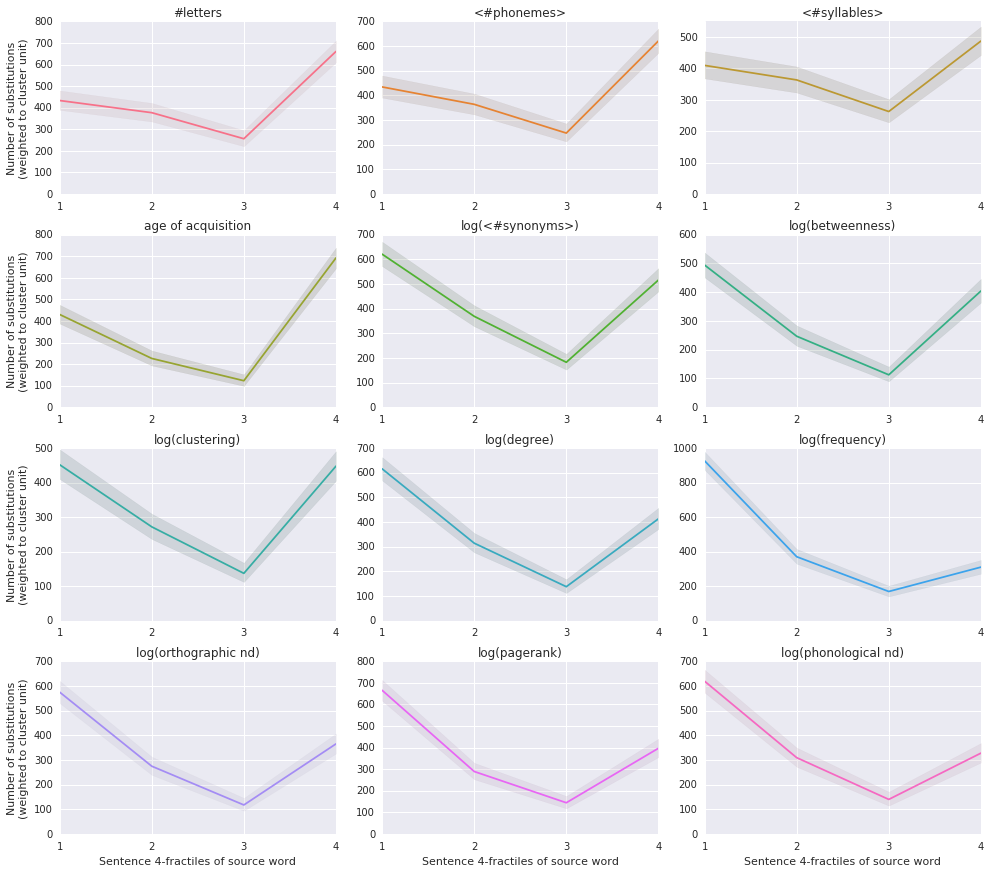

In [20]:
# Now plot.
g = sb.FacetGrid(data=fractiles, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're finally in a real multinomial sampling (and it's the only time). So we're going to use multinomial CIs.

### 5.2 Feature susceptibilities, reduced to features we expose in the paper

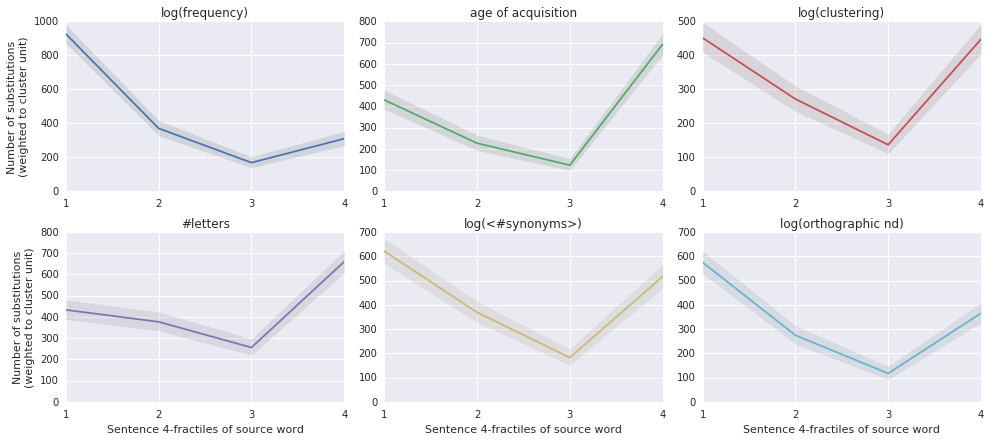

In [21]:
# Now plot.
g = sb.FacetGrid(data=fractiles[fractiles['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)